<p style="text-align:center; font-size:3.3em; color:#AD7D67; line-height:5rem; font-style:italic; font-weight:700;">
    Projet Datascientest :<br>
    Les accidents corporels de la circulation routière en France </p>
<p style="text-align:center; font-size:2.8em; color:#9EBEB8; line-height:4rem; font-style:italic; font-weight:700;">
    Visualisation et Pré-processing des données des années 2019-2020-2021
</p>

<h1>Sommaire<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importation-de-l'environnement-et-des-données-pour-2019-2020-2021" data-toc-modified-id="Importation-de-l'environnement-et-des-données-pour-2019-2020-2021-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importation de l'environnement et des données pour 2019-2020-2021</a></span></li><li><span><a href="#Analyse-de-la-temporalité" data-toc-modified-id="Analyse-de-la-temporalité-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Analyse de la temporalité</a></span></li><li><span><a href="#La-variable-Cible-:-la-gravité-des-accidents" data-toc-modified-id="La-variable-Cible-:-la-gravité-des-accidents-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>La variable Cible : la gravité des accidents</a></span></li><li><span><a href="#Sélection-des-variables-catégorielles-dépendantes" data-toc-modified-id="Sélection-des-variables-catégorielles-dépendantes-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Sélection des variables catégorielles dépendantes</a></span><ul class="toc-item"><li><span><a href="#Test-du-χ2-d'indépendance" data-toc-modified-id="Test-du-χ2-d'indépendance-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Test du χ2 d'indépendance</a></span></li><li><span><a href="#Quantification-des-variables-catégorielles" data-toc-modified-id="Quantification-des-variables-catégorielles-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Quantification des variables catégorielles</a></span></li><li><span><a href="#Test-du-χ2-d'indépendance-avec-les-valeurs-p-ajustées-de-Bonferroni" data-toc-modified-id="Test-du-χ2-d'indépendance-avec-les-valeurs-p-ajustées-de-Bonferroni-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Test du χ2 d'indépendance avec les valeurs p ajustées de Bonferroni</a></span></li></ul></li><li><span><a href="#Les-méthodes-de-filtrage-de-sélection-des-variables" data-toc-modified-id="Les-méthodes-de-filtrage-de-sélection-des-variables-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Les méthodes de filtrage de sélection des variables</a></span><ul class="toc-item"><li><span><a href="#Constant-features" data-toc-modified-id="Constant-features-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Constant features</a></span></li><li><span><a href="#Quasi-constant-features" data-toc-modified-id="Quasi-constant-features-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Quasi-constant features</a></span></li><li><span><a href="#Duplicated-features" data-toc-modified-id="Duplicated-features-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Duplicated features</a></span></li><li><span><a href="#Analyse-des-corrélations" data-toc-modified-id="Analyse-des-corrélations-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Analyse des corrélations</a></span></li></ul></li><li><span><a href="#Les-méthodes-Embedded" data-toc-modified-id="Les-méthodes-Embedded-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Les méthodes Embedded</a></span><ul class="toc-item"><li><span><a href="#Feature-Importances-with-RandomForestClassifier" data-toc-modified-id="Feature-Importances-with-RandomForestClassifier-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Feature Importances with RandomForestClassifier</a></span></li><li><span><a href="#Recursive-Feature-Selection-using-Random-Forests-importance" data-toc-modified-id="Recursive-Feature-Selection-using-Random-Forests-importance-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Recursive Feature Selection using Random Forests importance</a></span></li><li><span><a href="#Comparaison-des-performances-des-2-sous-ensembles-de-fonctionnalités" data-toc-modified-id="Comparaison-des-performances-des-2-sous-ensembles-de-fonctionnalités-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Comparaison des performances des 2 sous-ensembles de fonctionnalités</a></span></li></ul></li></ul></div>

# Importation de l'environnement et des données pour 2019-2020-2021

In [1]:
import warnings
import modin.pandas as pd
import numpy as np
import scipy.stats as stats
from datetime import datetime

# Visualisation
import seaborn as sns
from xplotter.insights import *
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = 6, 4

sns.set_style("ticks")
sns.color_palette("pink", as_cmap=True)

# pour ne pas imprimer les nombres en format scientifique
# et pour imprimer les float avec une précision de 2

#pd.set_option('display.max_columns', 25)
#pd.set_option('display.max_rows', 200)
#pd.set_option('display.max_colwidth', 30)
pd.set_option('display.float_format', '{:,.2f}'.format)

# pour ne pas imprimer les warnings
warnings.filterwarnings('ignore')

# version des librairies utilisées
import sys
print("python version", sys.version)
print("pandas version :", pd.__version__)
print("numpy version :", np.__version__)
print("scipy version :", np.__version__)
print("matplotlib version :", np.__version__)
print("seaborn version :", sns.__version__)

python version 3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]
pandas version : 1.5.3
numpy version : 1.21.5
scipy version : 1.21.5
matplotlib version : 1.21.5
seaborn version : 0.11.2


In [2]:
accidents_2019 = pd.read_csv('accidents_2019.csv')
accidents_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132876 entries, 0 to 132875
Data columns (total 41 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   place_occupée               132876 non-null  object
 1   catégorie_usager            132876 non-null  object
 2   sexe                        132876 non-null  object
 3   trajet                      132876 non-null  object
 4   secu1                       132876 non-null  object
 5   secu2                       132876 non-null  object
 6   secu3                       132876 non-null  object
 7   gravite_accident            132876 non-null  object
 8   age                         132876 non-null  object
 9   nb_equipement_securite      132876 non-null  object
 10  mois                        132876 non-null  int64 
 11  annee                       132876 non-null  int64 
 12  luminosite                  132876 non-null  object
 13  departement                 1

In [3]:
accidents_2020 = pd.read_csv('accidents_2020.csv')
accidents_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105232 entries, 0 to 105231
Data columns (total 41 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   place_occupée               105232 non-null  object
 1   catégorie_usager            105232 non-null  object
 2   sexe                        105232 non-null  object
 3   trajet                      105232 non-null  object
 4   secu1                       105232 non-null  object
 5   secu2                       105232 non-null  object
 6   secu3                       105232 non-null  object
 7   gravite_accident            105232 non-null  object
 8   age                         105232 non-null  object
 9   nb_equipement_securite      105232 non-null  object
 10  mois                        105232 non-null  int64 
 11  annee                       105232 non-null  int64 
 12  luminosite                  105232 non-null  object
 13  departement                 1

In [4]:
accidents_2021 = pd.read_csv('accidents_2021.csv')
accidents_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129153 entries, 0 to 129152
Data columns (total 41 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   place_occupée               129153 non-null  object
 1   catégorie_usager            129153 non-null  object
 2   sexe                        129153 non-null  object
 3   trajet                      129153 non-null  object
 4   secu1                       129153 non-null  object
 5   secu2                       129153 non-null  object
 6   secu3                       129153 non-null  object
 7   gravite_accident            129153 non-null  object
 8   age                         129153 non-null  object
 9   nb_equipement_securite      129153 non-null  object
 10  mois                        129153 non-null  int64 
 11  annee                       129153 non-null  int64 
 12  luminosite                  129153 non-null  object
 13  departement                 1

In [5]:
df_accidents = pd.concat([accidents_2019, accidents_2020, accidents_2021]).reset_index()
df_accidents.drop(labels=['index'], axis=1, inplace=True)
df_accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367261 entries, 0 to 367260
Data columns (total 41 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   place_occupée               367261 non-null  object
 1   catégorie_usager            367261 non-null  object
 2   sexe                        367261 non-null  object
 3   trajet                      367261 non-null  object
 4   secu1                       367261 non-null  object
 5   secu2                       367261 non-null  object
 6   secu3                       367261 non-null  object
 7   gravite_accident            367261 non-null  object
 8   age                         367261 non-null  object
 9   nb_equipement_securite      367261 non-null  object
 10  mois                        367261 non-null  int64 
 11  annee                       367261 non-null  int64 
 12  luminosite                  367261 non-null  object
 13  departement                 3

In [6]:
df_accidents.isna().sum().sum()

0

In [7]:
print(f'Nombre de lignes dupliquées : {df_accidents.duplicated().sum()}')

Nombre de lignes dupliquées : 3866


In [8]:
df_accidents.drop_duplicates(keep = 'first', inplace = True)
print(f'Nombre de lignes dupliquées : {df_accidents.duplicated().sum()}')

Nombre de lignes dupliquées : 0


In [9]:
df_accidents.shape

(363395, 41)

# Analyse de la temporalité

In [10]:
df_accidents['date'] = pd.to_datetime(df_accidents['date'])

In [11]:
df_accidents['annee'] = df_accidents['annee'].astype('object')

In [12]:
dico_mois = {1: 'January', 
             2: 'February', 
             3: 'March', 
             4: 'April',
             5: 'May', 
             6: 'June',
             7: 'July', 
             8: 'August', 
             9: 'September', 
             10: 'October',  
             11: 'November', 
             12: 'December' }

df_accidents['mois'] = df_accidents['mois'].map(dico_mois)

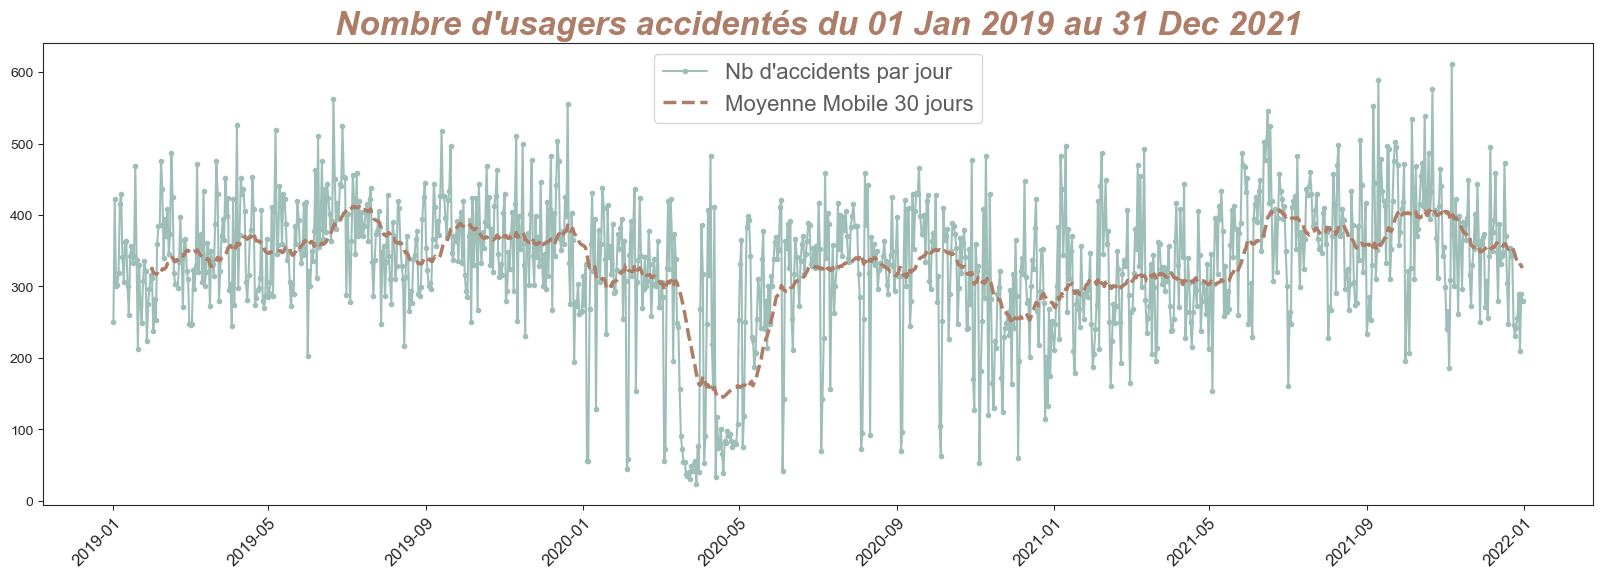

In [13]:
values = df_accidents['date'].value_counts().sort_index()

plt.figure(figsize=(20, 6))

plt.plot_date(values.index, values, linestyle='-', 
              lw= 1.5, color="#9ebeb8", marker = '.',
              label="Nb d'accidents par jour")

plt.plot_date(values.index, values.rolling(window=30).mean(), 
              linestyle='--', lw=2.5, color="#ad7d67", marker=None,
              label="Moyenne Mobile 30 jours")

plt.title(f"Nombre d'usagers accidentés du {df_accidents.date.min().strftime('%d %b %Y')} au {df_accidents.date.max().strftime('%d %b %Y')}",
          loc="center", fontsize=24, 
          fontstyle='italic',
          fontweight='bold', color="#ad7d67")

plt.xticks(fontsize=12, rotation=45, ha='right', rotation_mode='anchor')

plt.legend(loc='upper center', fontsize=16, labelcolor="#5e5c5e");

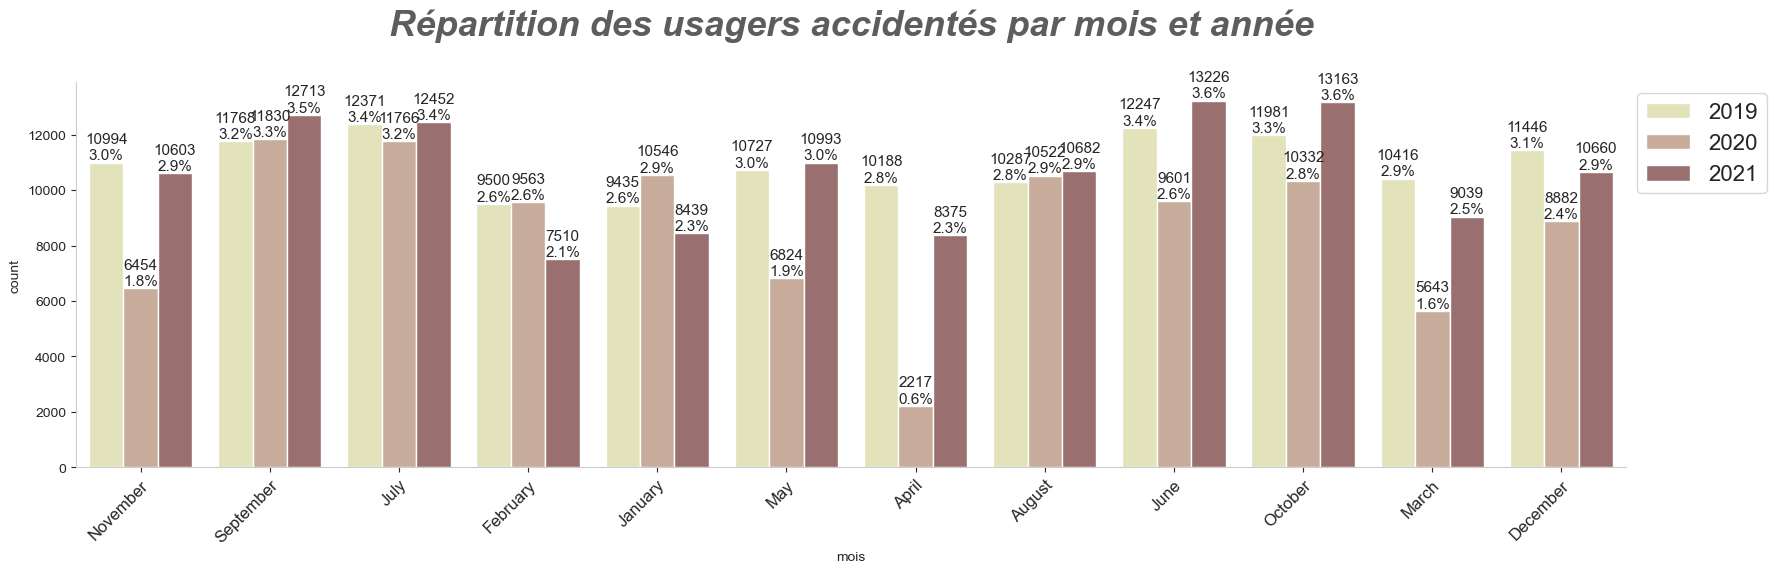

In [14]:
fig, ax = plt.subplots(figsize=(20, 5))

plot_countplot(df=df_accidents,
               col='mois',
               hue='annee',
               palette="pink_r", 
               ax=ax, 
               orient='v', 
               size_labels=11)

plt.xticks(fontsize=12, rotation=45, ha='right', rotation_mode='anchor')

plt.title("Répartition des usagers accidentés par mois et année\n",
          loc="center", fontsize=26,
          fontstyle='italic',
          fontweight='bold',
          color="#5e5c5e")

plt.legend(bbox_to_anchor=(1, 1), fontsize=16)

plt.show()

Ces 2 graphiques nous montrent clairement que pendant les périodes de confinement (mars, avril, novembre 2020) le nombre d'usagers accidentés de la route a très fortement diminué.

# La variable Cible : la gravité des accidents

In [15]:
df_accidents['gravite_accident'].value_counts()

indemne               151702
blessé_léger          145790
blessé_hospitalisé     56392
tué                     9452
autre                     59
Name: gravite_accident, dtype: int64

In [16]:
# Suppression des 60 usagers "autre"

df_accidents = df_accidents[df_accidents['gravite_accident'] != "autre"]
df_accidents.shape

(363336, 41)

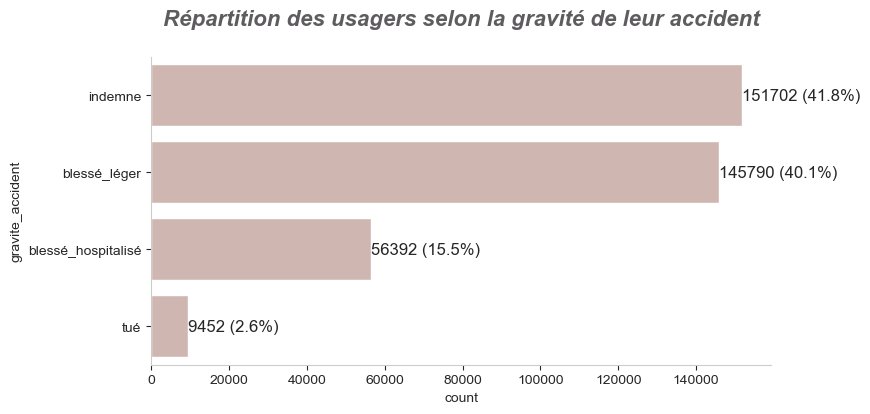

In [17]:
fig, ax = plt.subplots(figsize=(8, 4))

plot_countplot(df=df_accidents,
               col='gravite_accident',
               order=True,
               palette=['#d4b3ac'],
               ax=ax, orient='h',
               size_labels=12)

plt.title("Répartition des usagers selon la gravité de leur accident\n",
          loc="center", fontsize=16, fontstyle='italic', fontweight='bold', color="#5e5c5e")
plt.show()

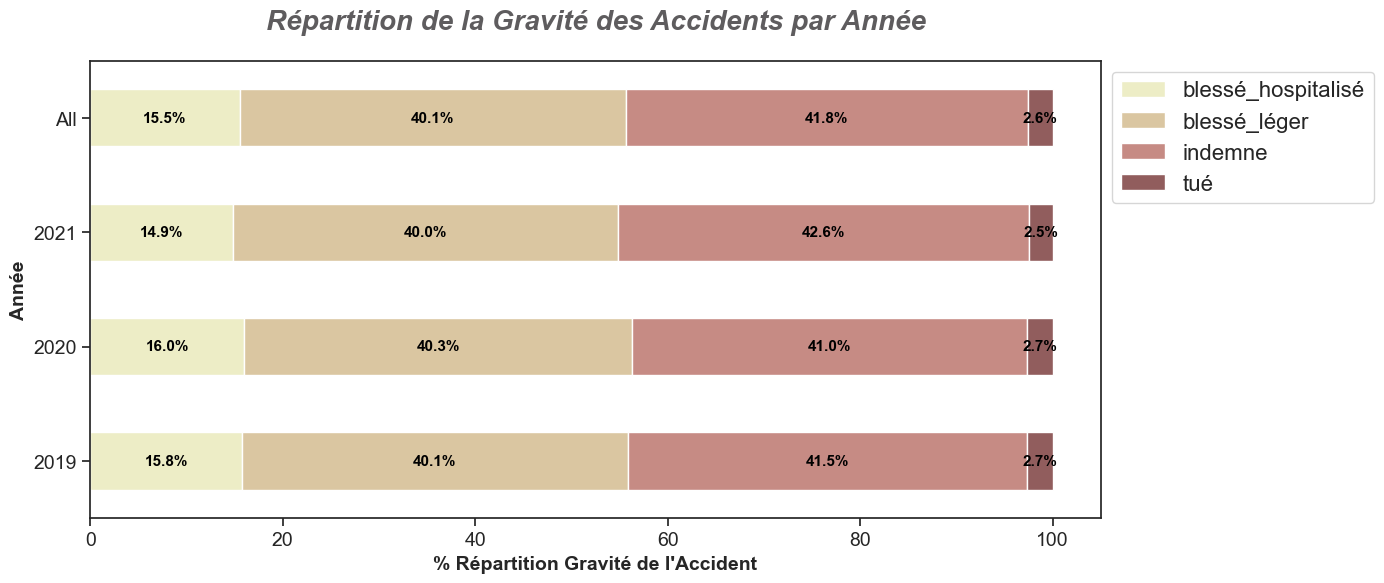

In [18]:
df_tab_croisee = pd.crosstab(df_accidents['annee'],
                             df_accidents['gravite_accident'],
                             normalize='index', margins=True, margins_name='All') * 100

sns.set(style="ticks", rc={'figure.figsize': (14, 6)})
sns.set_palette("pink_r", 4)

ax_1 = df_tab_croisee.plot.barh(stacked=True, 
                                rot=0)

for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2,
              rec.get_y() + height / 2,
              "{:.1f}%".format(rec.get_width()),
              ha='center',
              va='center',
              color='black',
              fontweight='bold',
              fontsize=11)

plt.xlabel("% Répartition Gravité de l'Accident", fontsize=14, fontweight='bold')
plt.xticks(fontsize=14)

plt.ylabel("Année", fontsize=14, fontweight='bold')
plt.yticks(fontsize=14)

plt.legend(bbox_to_anchor=(1, 1), fontsize=16)

plt.title('Répartition de la Gravité des Accidents par Année',
          y=1.05, fontsize=20, fontstyle='italic', fontweight='bold', color="#5e5c5e")

plt.tight_layout()
plt.show()

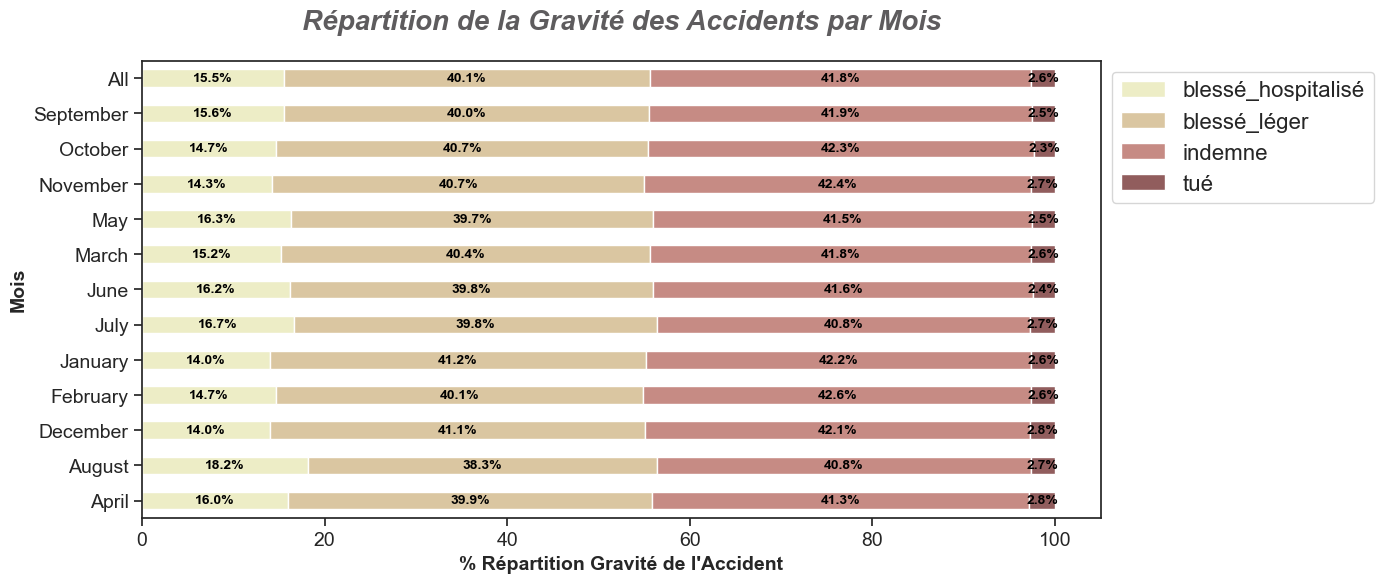

In [19]:
df_tab_croisee = pd.crosstab(df_accidents['mois'],
                             df_accidents['gravite_accident'],
                             normalize='index', margins=True, margins_name='All') * 100

sns.set(style="ticks", rc={'figure.figsize': (14, 6)})
sns.set_palette("pink_r", 4)

ax_1 = df_tab_croisee.plot.barh(stacked=True,
                                rot=0)

for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2,
              rec.get_y() + height / 2,
              "{:.1f}%".format(rec.get_width()),
              ha='center',
              va='center',
              color='black',
              fontweight='bold',
              fontsize=10)

plt.xlabel("% Répartition Gravité de l'Accident", fontsize=14, fontweight='bold')
plt.xticks(fontsize=14)

plt.ylabel("Mois", fontsize=14, fontweight='bold')
plt.yticks(fontsize=14)

plt.legend(bbox_to_anchor = (1, 1), fontsize = 16)
plt.title('Répartition de la Gravité des Accidents par Mois',
          y=1.05, fontsize=20, fontstyle='italic', fontweight='bold', color="#5e5c5e")
plt.tight_layout()
plt.show()

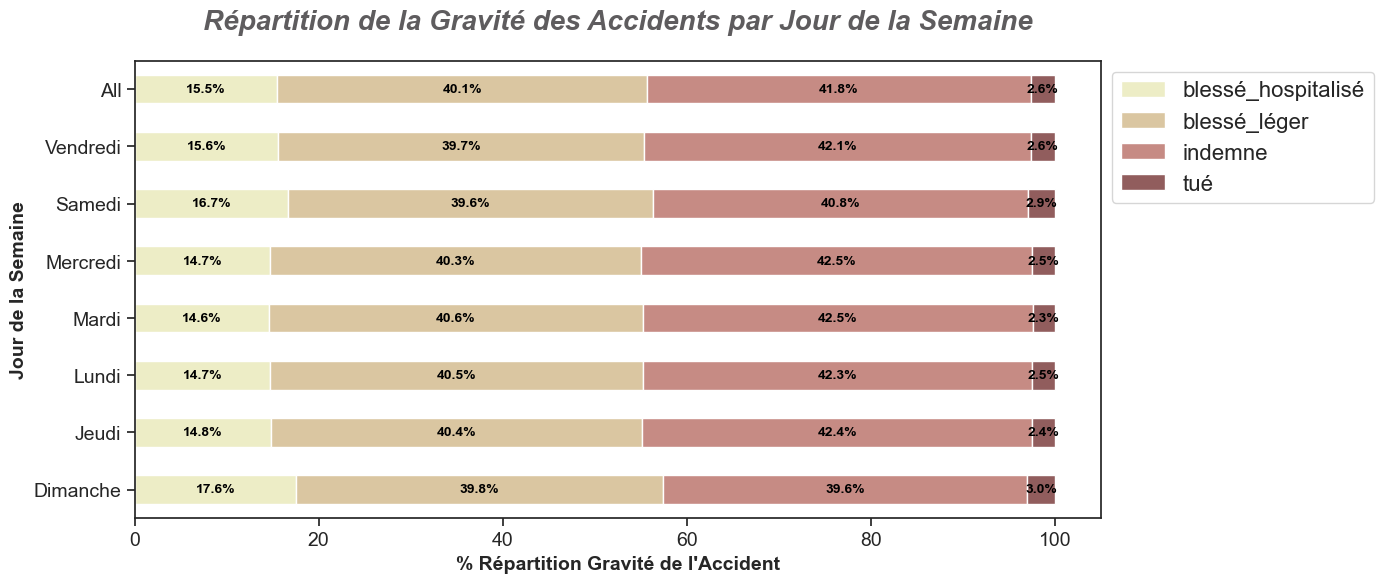

In [20]:
df_tab_croisee = pd.crosstab(df_accidents['weekday'],
                             df_accidents['gravite_accident'],
                             normalize='index', margins=True, margins_name='All') * 100

sns.set(style="ticks", rc={'figure.figsize': (14, 6)})
sns.set_palette("pink_r", 4)

ax_1 = df_tab_croisee.plot.barh(stacked=True, 
                                rot=0)

for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2,
              rec.get_y() + height / 2,
              "{:.1f}%".format(rec.get_width()),
              ha='center',
              va='center',
              color='black',
              fontweight='bold',
              fontsize=10)

plt.xlabel("% Répartition Gravité de l'Accident", fontsize=14, fontweight='bold')
plt.xticks(fontsize=14)

plt.ylabel("Jour de la Semaine", fontsize=14, fontweight='bold')
plt.yticks(fontsize=14)

plt.legend(bbox_to_anchor=(1, 1), fontsize=16)

plt.title('Répartition de la Gravité des Accidents par Jour de la Semaine',
          y=1.05, fontsize=20, fontstyle='italic', fontweight='bold', color="#5e5c5e")
plt.tight_layout()
plt.show()

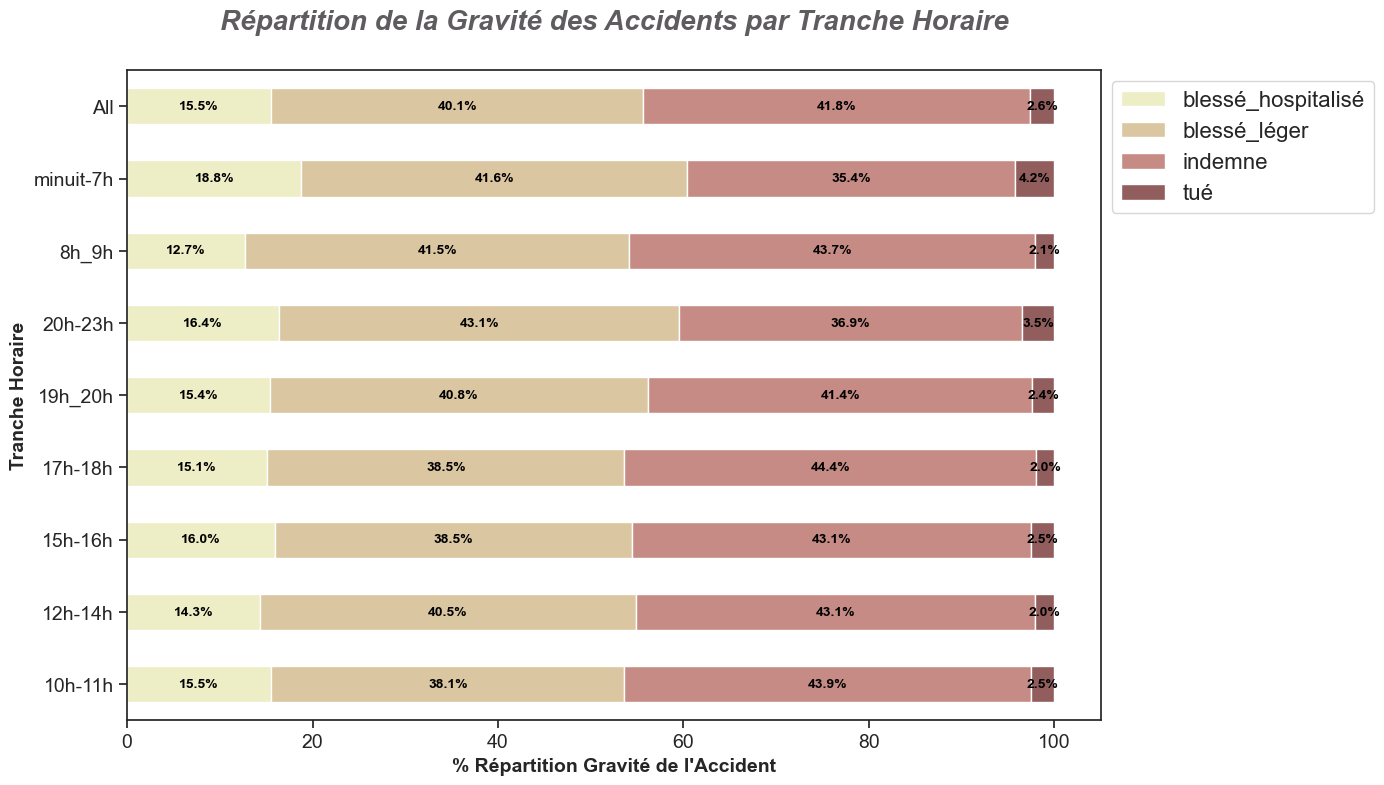

In [21]:
df_tab_croisee = pd.crosstab(df_accidents['tranche_heure'],
                             df_accidents['gravite_accident'],
                             normalize='index', margins=True, margins_name='All') * 100

sns.set(style="ticks", rc={'figure.figsize': (14, 8)})
sns.set_palette("pink_r", 4)

ax_1 = df_tab_croisee.plot.barh(stacked=True, 
                                rot=0)

for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2,
              rec.get_y() + height / 2,
              "{:.1f}%".format(rec.get_width()),
              ha='center',
              va='center',
              color='black',
              fontweight='bold',
              fontsize=10)

plt.xlabel("% Répartition Gravité de l'Accident", fontsize=14, fontweight='bold')
plt.xticks(fontsize=14)

plt.ylabel("Tranche Horaire", fontsize=14, fontweight='bold')
plt.yticks(fontsize=14)

plt.legend(bbox_to_anchor=(1, 1), fontsize=16)

plt.title('Répartition de la Gravité des Accidents par Tranche Horaire',
          y=1.05, fontsize=20, fontstyle='italic', fontweight='bold', color="#5e5c5e")
plt.tight_layout()
plt.show()

Il apparaît qu'il y a plus d'accidents mortels et de blessés hospitalisés la nuit (entre 20h et 7 heures du matin).

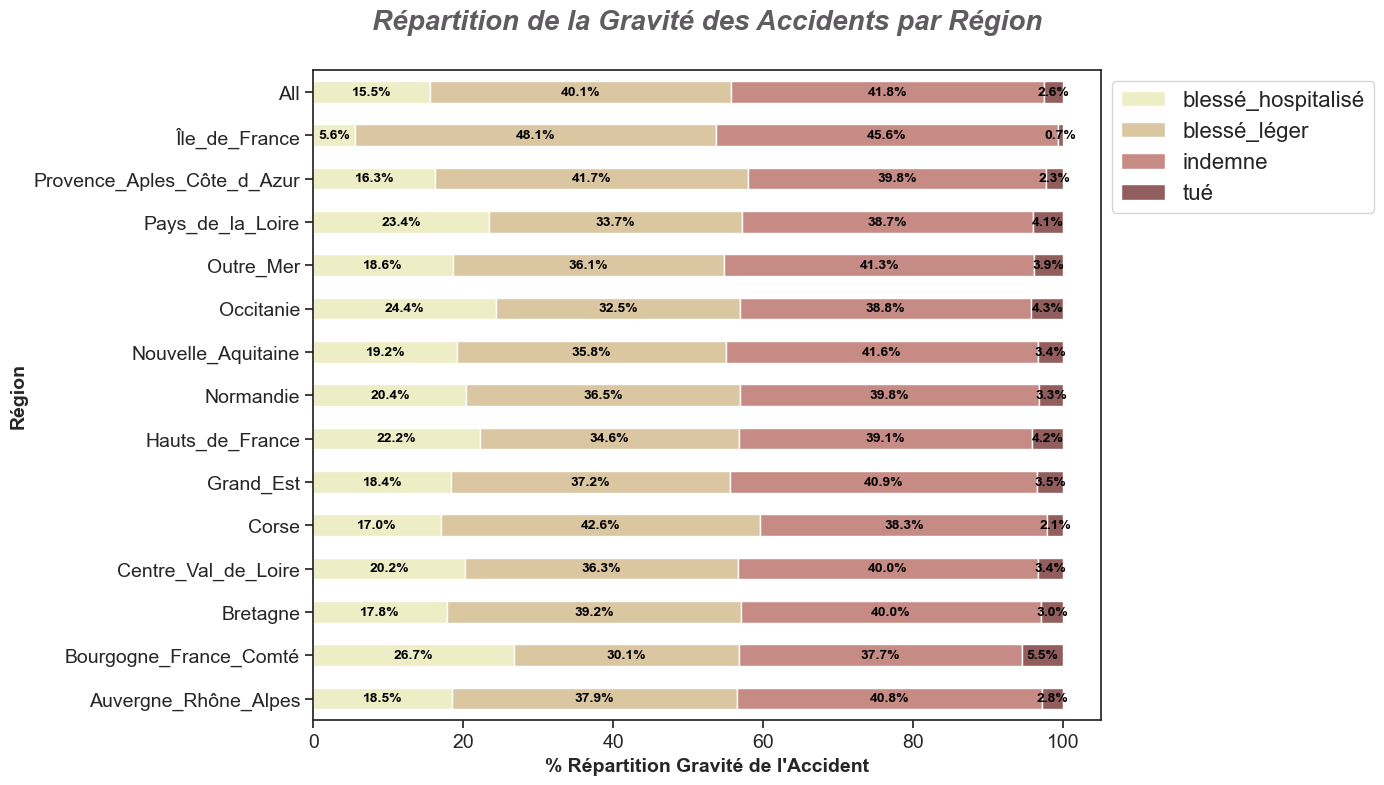

In [22]:
df_tab_croisee = pd.crosstab(df_accidents['region'],
                             df_accidents['gravite_accident'],
                             normalize='index', margins=True, margins_name='All') * 100

sns.set(style="ticks", rc={'figure.figsize': (14, 8)})
sns.set_palette("pink_r", 4)

ax_1 = df_tab_croisee.plot.barh(stacked=True, 
                                rot=0)

for rec in ax_1.patches:
    height = rec.get_height()
    ax_1.text(rec.get_x() + rec.get_width() / 2,
              rec.get_y() + height / 2,
              "{:.1f}%".format(rec.get_width()),
              ha='center',
              va='center',
              color='black',
              fontweight='bold',
              fontsize=10)

plt.xlabel("% Répartition Gravité de l'Accident", fontsize=14, fontweight='bold')
plt.xticks(fontsize=14)

plt.ylabel("Région", fontsize=14, fontweight='bold')
plt.yticks(fontsize=14)

plt.legend(bbox_to_anchor=(1, 1), fontsize=16)

plt.title('Répartition de la Gravité des Accidents par Région',
          y=1.05, fontsize=20, fontstyle='italic', fontweight='bold', color="#5e5c5e")
plt.tight_layout()
plt.show()

Contrairement aux différentes variables temporelles, la région semble avoir une certaine influence sur la gravité des accidents.

# Sélection des variables catégorielles dépendantes

## Test du χ2 d'indépendance

L'objectif ici est de sélectionner les variables qui ont un lien statistique avec la variable cible.

Pour cela, nous allons utiliser le ***Test du χ2 d'indépendance.***

Le test d'indépendance du χ2 est utilisé pour déterminer s'il existe une relation significative entre deux variables catégorielles (nominales). Cela signifie que le test d'indépendance du χ2 est un test d'hypothèse avec 2 hypothèses présentes ; l'hypothèse nulle et l'hypothèse alternative. 

L'hypothèse est écrite ci-dessous.

>***Hypothèse nulle (H0) : Il n'y a pas de relation entre les variables***
>
>***Hypothèse alternative (H1) : Il existe une relation entre les variables***

Comme tout test statistique, nous le testons par rapport à notre valeur p choisie (souvent elle est de 0,05). 

>***Si la valeur de p est significative (p ≤ 0,05), nous pouvons rejeter l'hypothèse nulle et affirmer que les résultats soutiennent l'hypothèse alternative.***

In [23]:
y = df_accidents['gravite_accident']

data =  df_accidents.drop(labels=['gravite_accident'], axis=1)

In [24]:
# Suppression des variables géographiques redondantes

data = data.drop(labels=['departement', 'nom_dep', 'num_commune', 'latitude', 'longitude', 'heure'], axis=1)

In [25]:
from scipy.stats import chi2_contingency

chi_ls = []

for feature in data.select_dtypes(include='object'):
    
    # create contingency table
    c = pd.crosstab(y, data[feature])
    
    # chi_test
    p_value = chi2_contingency(c)[1]
    chi_ls.append(p_value)
    
    if p_value <= 0.05:
        print(f"{feature} :\n On rejette H0 : il existe une relation entre les 2 variables qualitatives\n")
    else:
        print(f"{feature} :\n On accepte H0 : les 2 variables qualitatives sont indépendantes\n")

place_occupée :
 On rejette H0 : il existe une relation entre les 2 variables qualitatives

catégorie_usager :
 On rejette H0 : il existe une relation entre les 2 variables qualitatives

sexe :
 On rejette H0 : il existe une relation entre les 2 variables qualitatives

trajet :
 On rejette H0 : il existe une relation entre les 2 variables qualitatives

secu1 :
 On rejette H0 : il existe une relation entre les 2 variables qualitatives

secu2 :
 On rejette H0 : il existe une relation entre les 2 variables qualitatives

secu3 :
 On rejette H0 : il existe une relation entre les 2 variables qualitatives

age :
 On rejette H0 : il existe une relation entre les 2 variables qualitatives

nb_equipement_securite :
 On rejette H0 : il existe une relation entre les 2 variables qualitatives

mois :
 On rejette H0 : il existe une relation entre les 2 variables qualitatives

annee :
 On rejette H0 : il existe une relation entre les 2 variables qualitatives

luminosite :
 On rejette H0 : il existe une

In [26]:
df_pvalue = pd.DataFrame(chi_ls, 
                         index=data.select_dtypes(include='object').columns, 
                         columns=['p_value']).sort_values(by='p_value', ascending=True)

pd.set_option('display.float_format', '{:,.5f}'.format)
df_pvalue


,p_value
place_occupée,0.00000
obstacle_mobile_heurté,0.00000
catégorie_véhicule,0.00000
vitesse_maximale_autorisee,0.00000
situation_accident,0.00000
trace_plan,0.00000
declivite_route,0.00000
nbr_voies,0.00000
sens_circulation,0.00000
categorie_route,0.00000


Il existe une relation entre la variable cible et toutes les variables qualitatives explicatives.

Le test d'indépendance du χ2 est un test omnibus, ce qui signifie qu'il teste les données dans leur ensemble. 

Lorsque nous avons plusieurs modalités dans une variable catégorielle, nous ne sommes pas en mesure de dire facilement quelle est celle qui est responsable de la relation (si la table χ2 est supérieure à 2 × 2). 

Pour identifier quelle(s) modalité(s) est(sont) responsable(s), nous avons besoin d'un ***test post hoc.***

<br><br>

**Cependant augmenter le nombre de tests (comme comparer plusieurs modalités les unes contre les autres) signifie que la probabilité de se tromper augmente aussi.**

***Pourquoi ?***

Imaginons que nous avons comparé globalement 3 moyennes (dont une de contrôle), que celle-ci est significative, et qu’à présent, nous souhaitons comparer les deux moyennes à la moyenne contrôle pour savoir si elles sont différentes. Nous allons donc réaliser deux tests post-hocs.

Lorsqu’on ne considère qu’un seul test, la probabilité de faire une erreur en concluant que les deux moyennes sont différentes alors qu’elles ne le sont pas, autrement dit de faire un faux positif, correspond au risque alpha : P(faire 1 erreur)=α
La probabilité complémentaire, correspond donc à la probabilité de ne pas commettre d’erreur : P(NE PAS faire d’erreur)=1−α

Lorsque deux tests sont réalisés, la probabilité de ne pas faire d’erreur (de type faux positif) lors du premier test ET lors du second test, est la probabilité de ne commettre aucune erreur. En pratique cette probabilité de ne pas faire d’erreur lors des deux tests est le produit de la probabilité de ne pas faire d’erreur lors d’un test unique :

P(NE PAS faire d’erreur dans les 2 tests)=(1−α)⋆(1−α)
P(NE PAS faire d’erreur dans les 2 tests)=(1−α)2
Ne pas faire d’erreur lors des deux tests signifie “ne faire aucune erreur lors des 2 tests”, On peut donc aussi écrire : P(faire aucune erreur lors des 2 tests)=(1−α)2

La probabilité complémentaire de cette probabilité correspond à la probabilité de commettre au moins une erreur, de type faux positif, lors des deux tests. 
On peut l’écrire : P(faire au moins une erreur lors des 2 tests)=1−(1−α)2

Lorsqu’on réalise k comparaisons multiples, l’équation se généralise en : P(faire au moins une erreur lors de k tests)=1−(1−α)k
Cette probabilité est appelée risqua alpha global : αglobal=1−(1−α)k

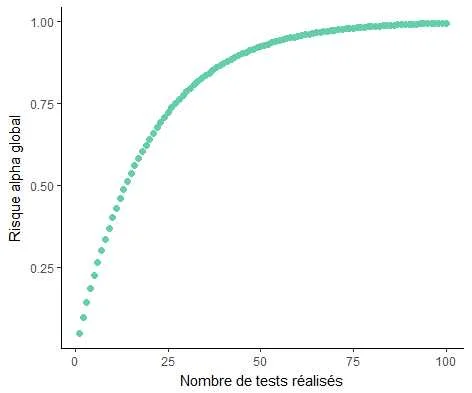


***Ce qu’il faut retenir ici c’est que le risque de commettre au moins une erreur (de type faux positif) augmente lorsque le nombre de comparaisons multiples augmente.***

**Comment prendre en compte l’augmentation du risque global de se tromper ?**

Une des possibilités est d’agir au niveau des p-values. Il s’agit, en quelque sorte, de les recalibrer, en pratique de les rehausser, pour pouvoir continuer à les comparer dans tous les cas, à un risque alpha de 5%. C’est cela qu’on appelle l’**ajustement des p-values** !

La méthode la plus connue (même si c'est aussi la plus restrictive) est l'ajustement de Bonferroni pour les comparaisons par paires.

La correction de Bonferroni consiste à diviser le niveau alpha souhaité par le nombre de comparaisons pour utiliser le nombre ainsi calculé comme valeur p afin de déterminer la signification. Ainsi, par exemple, avec alpha fixé à 0,05 et trois comparaisons, la valeur p-ajusté requise pour la signification serait de 0,05/3 = 0,0167.

En utilisant la valeur P ajustée, nous pouvons alors tester tous les résultats précédemment significatifs pour voir quelle modalité est responsable de la création d'une relation significative.

Mais, il faut d'abord quantifier nos variables catégorielles.

## Quantification des variables catégorielles

Les données catégorielles ne sont pas utilisables avec tous les algotithmes de Machine Learning. C'est la raison pour laquelle nous devons les quantifier.

**Nous devons être prudents lorsqu'il s'agit d'encoder des catégories sous forme de nombres. Nous voulons nous assurer que la relation numérique a un sens pour un modèle.**

Les **variables catégorielles ordinales** peuvent être remplacées par une valeur chiffrée. Ce sont des variables catégorielles dont les valeurs suivent un ordre naturel.

Pour les **variables catégorielles nominales** en revanche, cela fausserait la signification de la colonne en donnant plus de poids à une modalité qu'à une autre. 
Ce sont des variables catégorielles dont les valeurs ne suivent pas un ordre naturel. 

Pour ces variables non ordonnées, la technique de quantification utilisée est la "dummification" qui va créer des dummy variables. La variable initiale est alors remplacée par un ensemble de nouvelles variables dites fictives (ou indicatrices) prenant les valeurs 0 ou 1 pour indiquer l'absence ou la présence de la modalité. 

Néanmoins, pour éviter la multicolinéarité qui se produit lorsque un ensemble exhaustif de variables fictives et le terme constant sont présents, ce qu'on appelle le piège à variable fictive, il est impératif de supprimer soit le terme constant, soit l'une des indicatrices incriminées. La variable fictive retirée devient alors la catégorie de base à laquelle les autres catégories sont comparées.

In [27]:
var_cat_nominale = data.select_dtypes(include='object').columns.to_list()
print(var_cat_nominale)

['place_occupée', 'catégorie_usager', 'sexe', 'trajet', 'secu1', 'secu2', 'secu3', 'age', 'nb_equipement_securite', 'mois', 'annee', 'luminosite', 'localisation', 'intersection', 'condition_atmospheriques', 'type_collision', 'weekday', 'tranche_heure', 'region', 'categorie_route', 'sens_circulation', 'nbr_voies', 'declivite_route', 'trace_plan', 'etat_surface', 'infrastructure', 'situation_accident', 'vitesse_maximale_autorisee', 'repère_sens_circulation', 'catégorie_véhicule', 'obstacle_mobile_heurté', 'choc_initial', 'manoeuvre_principale']


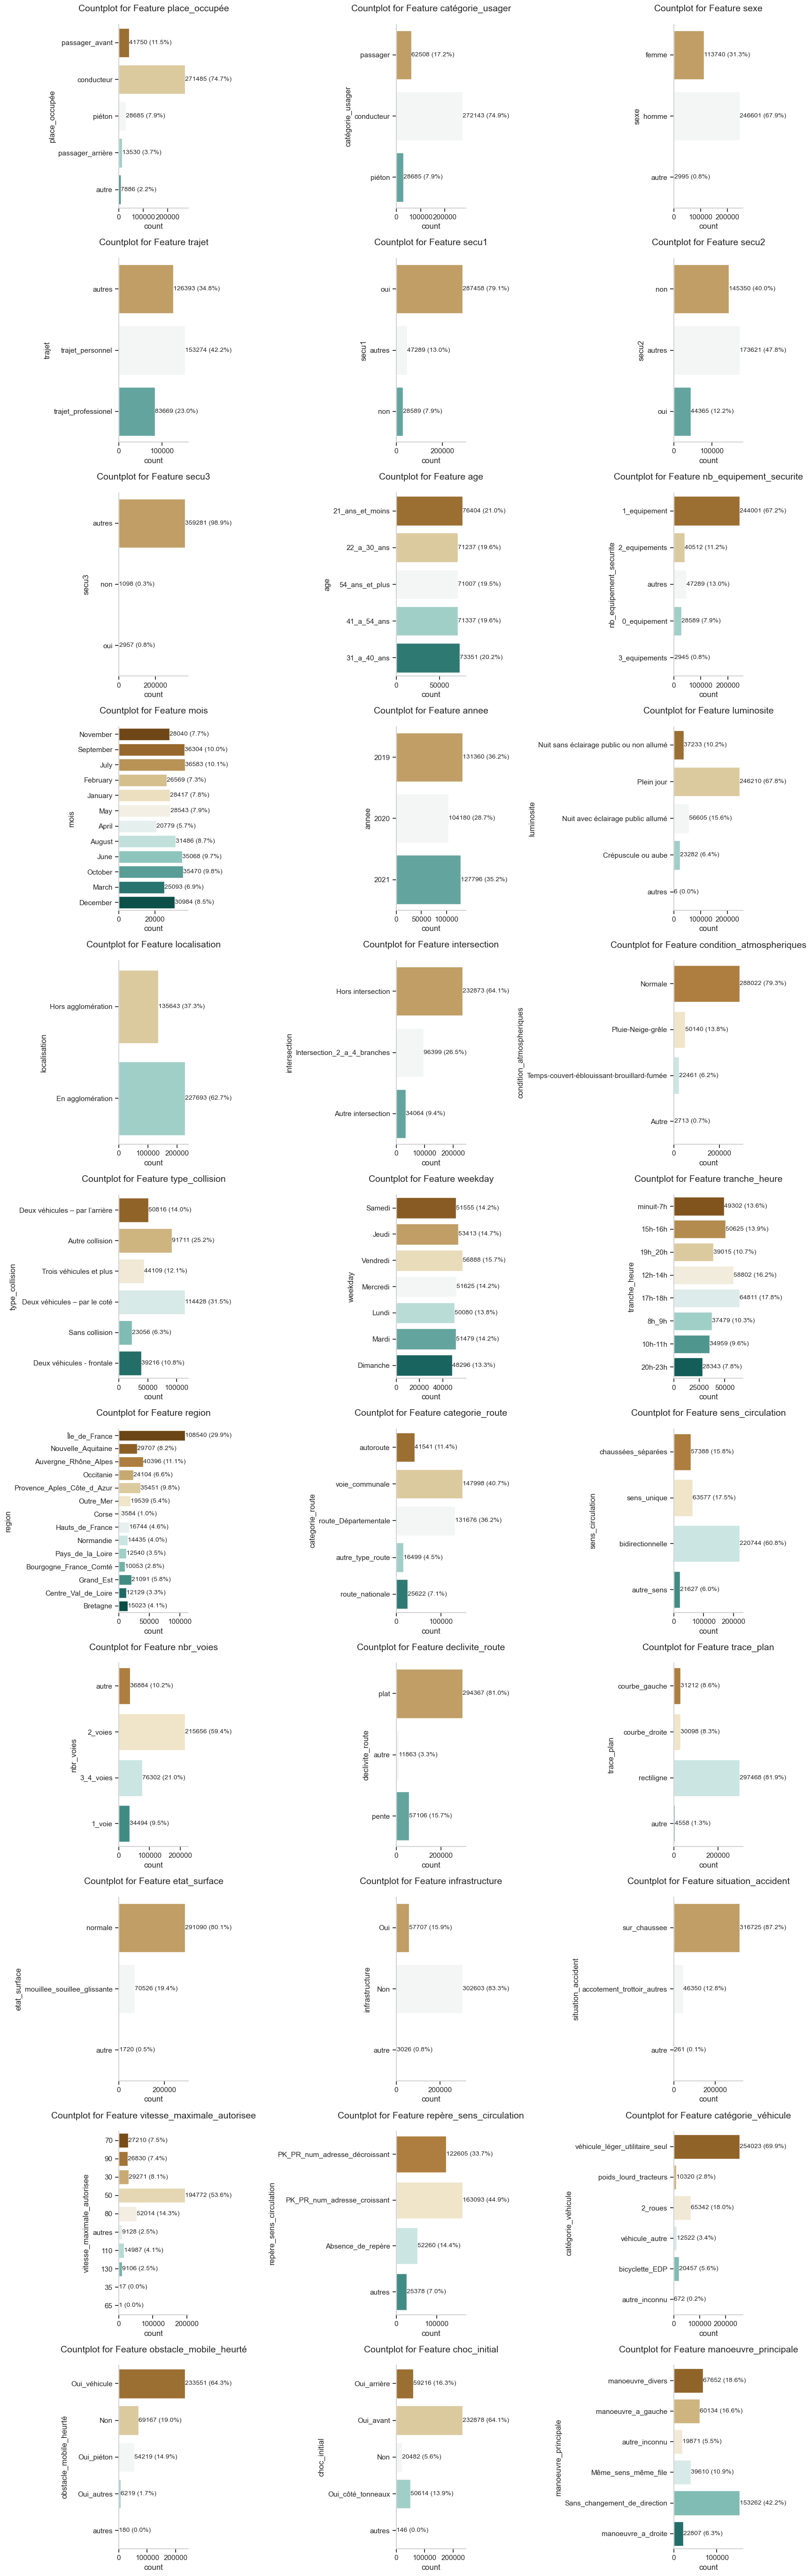

In [28]:
sns.set(style="ticks")

plot_multiple_countplots(df=data.select_dtypes(include='object'),
                         n_cols=3,
                         col_list=var_cat_nominale,
                         orient='h',
                         palette="BrBG",
                         size_labels=10,
                         size_title=14)
plt.tight_layout()
plt.show()

En dehors de la variable `nb_equipement_securite`, toutes nos variables sont des variables qualitatives nominales.

In [29]:
var_cat_ordinale = ['nb_equipement_securite']

In [30]:
data[var_cat_ordinale] = data[var_cat_ordinale].astype('category')

In [31]:
# vérification : les modalités sont-elles reconnues comme ordonnées ?
for s in var_cat_ordinale:
    data[s] = data[s].cat.as_ordered()
    print(s)
    print(data[s], end="\n\n\n")

nb_equipement_securite
0         1_equipement
1         1_equipement
2         1_equipement
3         1_equipement
4         1_equipement
              ...     
367256    1_equipement
367257    1_equipement
367258    0_equipement
367259    1_equipement
367260    1_equipement
Name: nb_equipement_securite, Length: 363336, dtype: category
Categories (5, object): ['0_equipement' < '1_equipement' < '2_equipements' < '3_equipements' < 'autres']




Les modalités de cette variable sont bien reconnues dans l'ordre. Nous pouvons donc la transformer en numérique directement.

In [32]:
for s in var_cat_ordinale:
    data[s] = data[s].cat.codes

In [33]:
data[var_cat_ordinale].value_counts()

nb_equipement_securite
1                         244001
4                          47289
2                          40512
0                          28589
3                           2945
dtype: int64

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363336 entries, 0 to 367260
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   place_occupée               363336 non-null  object        
 1   catégorie_usager            363336 non-null  object        
 2   sexe                        363336 non-null  object        
 3   trajet                      363336 non-null  object        
 4   secu1                       363336 non-null  object        
 5   secu2                       363336 non-null  object        
 6   secu3                       363336 non-null  object        
 7   age                         363336 non-null  object        
 8   nb_equipement_securite      363336 non-null  int8          
 9   mois                        363336 non-null  object        
 10  annee                       363336 non-null  object        
 11  luminosite                  363336 non-

In [35]:
var_cat_nominale = data.select_dtypes(include='object').columns.to_list()
print(var_cat_nominale)

['place_occupée', 'catégorie_usager', 'sexe', 'trajet', 'secu1', 'secu2', 'secu3', 'age', 'mois', 'annee', 'luminosite', 'localisation', 'intersection', 'condition_atmospheriques', 'type_collision', 'weekday', 'tranche_heure', 'region', 'categorie_route', 'sens_circulation', 'nbr_voies', 'declivite_route', 'trace_plan', 'etat_surface', 'infrastructure', 'situation_accident', 'vitesse_maximale_autorisee', 'repère_sens_circulation', 'catégorie_véhicule', 'obstacle_mobile_heurté', 'choc_initial', 'manoeuvre_principale']


In [36]:
data = pd.get_dummies(data,
                      columns=var_cat_nominale,
                      drop_first=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363336 entries, 0 to 367260
Columns: 127 entries, nb_equipement_securite to manoeuvre_principale_manoeuvre_divers
dtypes: datetime64[ns](1), int8(1), uint8(125)
memory usage: 49.2 MB


In [37]:
data.drop(labels=['date'], axis=1, inplace=True)

In [38]:
print(f"Nombre d'usagers ayant eu un accident de la route entre 2019 et 2021 : {data.shape[0]}")
print(f"Nombre de variables explicatives : {data.shape[1]}")

Nombre d'usagers ayant eu un accident de la route entre 2019 et 2021 : 363336
Nombre de variables explicatives : 126


In [39]:
pd.set_option('display.float_format', '{:,.2f}'.format)
pd.set_option('display.max_rows', None)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
nb_equipement_securite,"363,336.00",1.44,1.10,0.00,1.00,1.00,1.00,4.00
place_occupée_conducteur,"363,336.00",0.75,0.43,0.00,0.00,1.00,1.00,1.00
place_occupée_passager_arrière,"363,336.00",0.04,0.19,0.00,0.00,0.00,0.00,1.00
place_occupée_passager_avant,"363,336.00",0.11,0.32,0.00,0.00,0.00,0.00,1.00
place_occupée_piéton,"363,336.00",0.08,0.27,0.00,0.00,0.00,0.00,1.00
catégorie_usager_passager,"363,336.00",0.17,0.38,0.00,0.00,0.00,0.00,1.00
catégorie_usager_piéton,"363,336.00",0.08,0.27,0.00,0.00,0.00,0.00,1.00
sexe_femme,"363,336.00",0.31,0.46,0.00,0.00,0.00,1.00,1.00
sexe_homme,"363,336.00",0.68,0.47,0.00,0.00,1.00,1.00,1.00
trajet_trajet_personnel,"363,336.00",0.42,0.49,0.00,0.00,0.00,1.00,1.00


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363336 entries, 0 to 367260
Columns: 126 entries, nb_equipement_securite to manoeuvre_principale_manoeuvre_divers
dtypes: int8(1), uint8(125)
memory usage: 46.4 MB


## Test du χ2 d'indépendance avec les valeurs p ajustées de Bonferroni

In [41]:
var_dummies = data.columns.to_list()
print(f"Nombre de variables dummies : {len(var_dummies)}\n")
print(var_dummies)

Nombre de variables dummies : 126

['nb_equipement_securite', 'place_occupée_conducteur', 'place_occupée_passager_arrière', 'place_occupée_passager_avant', 'place_occupée_piéton', 'catégorie_usager_passager', 'catégorie_usager_piéton', 'sexe_femme', 'sexe_homme', 'trajet_trajet_personnel', 'trajet_trajet_professionel', 'secu1_non', 'secu1_oui', 'secu2_non', 'secu2_oui', 'secu3_non', 'secu3_oui', 'age_22_a_30_ans', 'age_31_a_40_ans', 'age_41_a_54_ans', 'age_54_ans_et_plus', 'mois_August', 'mois_December', 'mois_February', 'mois_January', 'mois_July', 'mois_June', 'mois_March', 'mois_May', 'mois_November', 'mois_October', 'mois_September', 'annee_2020', 'annee_2021', 'luminosite_Nuit avec éclairage public allumé', 'luminosite_Nuit sans éclairage public ou non allumé', 'luminosite_Plein jour', 'luminosite_autres', 'localisation_Hors agglomération', 'intersection_Hors intersection', 'intersection_Intersection_2_a_4_branches', 'condition_atmospheriques_Normale', 'condition_atmospheriques_Pl

In [42]:
chi_ls_ajuste = pd.DataFrame()

for feature in var_dummies:
    
    # create contingency table avec la variable cible
    c = pd.crosstab(y, data[feature])
    
    # chi_test
    bon_p_value = 0.05/data[var_dummies].shape[1]
    
    p_value = chi2_contingency(c)[1]
        
    if p_value <= bon_p_value:
        hypothese = "On rejette H0 : il existe une relation entre les 2 variables qualitatives"
    else:
        hypothese = "On accepte H0 : les 2 variables qualitatives sont indépendantes"
    
    chi_ls_ajuste = pd.DataFrame(data=[[p_value, hypothese]],
                                 index=data.columns,
                                 columns=['P_value', 'Décision'])

In [43]:
pd.set_option('display.float_format', '{:,.5f}'.format)
pd.set_option('display.max_colwidth', 100)
chi_ls_ajuste

,P_value,Décision
nb_equipement_securite,0.00000,On rejette H0 : il existe une relation entre les 2 variables qualitatives
place_occupée_conducteur,0.00000,On rejette H0 : il existe une relation entre les 2 variables qualitatives
place_occupée_passager_arrière,0.00000,On rejette H0 : il existe une relation entre les 2 variables qualitatives
place_occupée_passager_avant,0.00000,On rejette H0 : il existe une relation entre les 2 variables qualitatives
place_occupée_piéton,0.00000,On rejette H0 : il existe une relation entre les 2 variables qualitatives
catégorie_usager_passager,0.00000,On rejette H0 : il existe une relation entre les 2 variables qualitatives
catégorie_usager_piéton,0.00000,On rejette H0 : il existe une relation entre les 2 variables qualitatives
sexe_femme,0.00000,On rejette H0 : il existe une relation entre les 2 variables qualitatives
sexe_homme,0.00000,On rejette H0 : il existe une relation entre les 2 variables qualitatives
trajet_trajet_personnel,0.00000,On rejette H0 : il existe une relation entre les 2 variables qualitatives


# Les méthodes de filtrage de sélection des variables

**Les méthodes de filtrage sélectionnent des fonctionnalités indépendamment de tout algorithme d'apprentissage automatique.**

Les méthodes de filtrage reposent uniquement sur les caractéristiques des données, c’est-à-dire sur les caractéristiques des fonctionnalités elles-mêmes.

Par conséquent, les méthodes de filtrage présentent deux avantages principaux.

1. Premièrement, elles sont indépendantes du modèle.
Cela signifie que les fonctionnalités sélectionnées par ces procédures peuvent en général être utilisées dans n'importe quel algorithme d’apprentissage automatique. 

2. Et deuxièmement, elles sont peu coûteuses en termes de calcul Ce qui signifie que vous pouvez filtrer des milliers de fonctionnalités en quelques secondes.

<br>
Un algorithme de filtre typique se compose de deux étapes :

   - Dans la première étape, Il classe les fonctionnalités en fonction de certains critères.
Les méthodes de filtrage sont également généralement univariées, ce qui signifie que chaque caractéristique est classée individuellement et indépendamment de l'espace des caractéristiques, c'est-à-dire indépendamment des autres caractéristiques. 

   - Dans la deuxième étape, les caractéristiques les mieux classées sont choisies pour utiliser la classification ou les modèles de régression.
Mais, comme les fonctionnalités sont classées indépendamment des autres fonctionnalités, l'interaction entre les variables n'est pas prise en compte dans les méthodes de filtrage et par conséquent elles ont tendance à sélectionner des variables redondantes.

Au cours des dernières décennies, un certain nombre de critères de classement ont été proposés pour des algorithmes de sélection de caractéristiques basés sur un filtre univarié. En général, ces critères reposent sur le classement des fonctionnalités basées sur divers tests statistiques comme, le score de Fisher, qui utilise la distribution du Chi Carré, ou des tests paramétriques univariés comme l'Anova ou encore des méthodes basées sur l'information mutuelle. On peut aussi classer des caractéristiques en regardant leur variance ce qui est particulièrement pertinent pour éliminer les caractéristiques constantes ou presque constantes qui fournissent peu ou pas d’information. Il existe également des méthodes de sélection de filtres multivariés. Ces méthodes considèrent les caractéristiques en relation aux autres caractéristiques du jeu de données. Par conséquent, le schéma multivarié est naturellement capable de gérer des caractéristiques redondantes. Le critère recherche les caractéristiques dupliquées et les caractéristiques corrélées.

> *Les Méthodes de filtrage en général, fournissent des méthodes simples mais puissantes pour analyser et supprimer rapidement les fonctionnalités non pertinentes et redondantes Ces Méthodes de filtrage sont généralement la première étape de toute sélection de fonctionnalités. En fait, dans les jeux de données qui contiennent un grand nombre de fonctionnalités, il est possible de réduire rapidement l'espace des fonctionnalités en supprimant les variables constantes, les variables dupliquées et corrélées.*

## Constant features

Les caractéristiques constantes sont celles qui affichent la même valeur, une seule valeur, pour toutes les observations de l'ensemble de données. En d'autres termes, la même valeur pour toutes les lignes du jeu de données. Ces fonctionnalités ne fournissent aucune information permettant à un modèle d'apprentissage automatique de discriminer ou de prédire une cible.

L'identification et la suppression de fonctionnalités constantes constituent une première étape facile vers la sélection de fonctionnalités et des modèles d'apprentissage automatique plus facilement interprétables.

Pour identifier les caractéristiques constantes, nous pouvons utiliser le VarianceThreshold de Scikit-learn, ou nous pouvons le coder nous-mêmes. Si vous utilisez le VarianceThreshold, toutes nos variables doivent être numériques. Cependant, si nous le faisons manuellement, nous pouvons appliquer le code à la fois aux variables numériques et catégorielles.

Le VarianceThreshold de sklearn fournit une approche de base simple pour la sélection des fonctionnalités. Il supprime toutes les fonctionnalités dont la variance n'atteint pas un certain seuil. Par défaut, il supprime toutes les caractéristiques à variance nulle, c'est-à-dire les caractéristiques qui ont la même valeur dans tous les échantillons.

In [44]:
from sklearn.feature_selection import VarianceThreshold

selec = VarianceThreshold(threshold=0.00)

selec.fit(data) 

VarianceThreshold()

In [45]:
sum(selec.get_support())

126

Mais comme nous n'avons que des variables explicatives booléennes, ce filtrage nous supprimerait toutes les variables explicatives !

## Quasi-constant features

Les caractéristiques quasi-constantes sont celles qui montrent la même valeur pour la grande majorité des observations de l'ensemble de données. En général, ces fonctionnalités fournissent peu d'informations, voire aucune, permettant à un modèle d'apprentissage automatique de discriminer ou de prédire une cible. Mais il peut y avoir des exceptions. Nous devons donc être prudent lorsque nous supprimons ce type de fonctionnalités.

L'identification et la suppression de fonctionnalités quasi constantes constituent une première étape facile vers la sélection de fonctionnalités et des modèles d'apprentissage automatique plus interprétables.

Pour identifier les caractéristiques quasi-constantes, nous pouvons utiliser le VarianceThreshold de Scikit-learn, ou nous pouvons le coder nous-mêmes. Si nous utilisons le VarianceThreshold, toutes nos variables doivent être numériques. Cependant, si nous le codons manuellement, nous pouvons appliquer le code à la fois aux variables numériques et catégorielles.

In [46]:
quasi_constant_feat = []

for feature in data.columns:

    # find the predominant value, that is the value that is shared
    # by most observations
    predominant = data[feature].value_counts(
        normalize=True).sort_values(ascending=False).values[0]

    # evaluate the predominant feature: do more than 95% of the observations
    # show 1 value?
    if predominant > 0.95:

        # if yes, add the variable to the list
        quasi_constant_feat.append(feature)

len(quasi_constant_feat)

24

In [47]:
print(quasi_constant_feat)

['place_occupée_passager_arrière', 'secu3_non', 'secu3_oui', 'luminosite_autres', 'region_Bourgogne_France_Comté', 'region_Bretagne', 'region_Centre_Val_de_Loire', 'region_Corse', 'region_Hauts_de_France', 'region_Normandie', 'region_Pays_de_la_Loire', 'categorie_route_autre_type_route', 'infrastructure_autre', 'situation_accident_autre', 'vitesse_maximale_autorisee_130', 'vitesse_maximale_autorisee_35', 'vitesse_maximale_autorisee_65', 'vitesse_maximale_autorisee_autres', 'catégorie_véhicule_autre_inconnu', 'catégorie_véhicule_poids_lourd_tracteurs', 'catégorie_véhicule_véhicule_autre', 'obstacle_mobile_heurté_Oui_autres', 'obstacle_mobile_heurté_autres', 'choc_initial_autres']


In [48]:
data.drop(labels=quasi_constant_feat, axis=1, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363336 entries, 0 to 367260
Columns: 102 entries, nb_equipement_securite to manoeuvre_principale_manoeuvre_divers
dtypes: int8(1), uint8(101)
memory usage: 46.2 MB


## Duplicated features

Souvent, les jeux de données contiennent des entités dupliquées, c'est-à-dire des entités qui, malgré des noms différents, sont identiques.

De plus, nous pouvons souvent introduire des fonctionnalités dupliquées lors de l'exécution d'un encodage à chaud de variables catégorielles, en particulier si nos ensembles de données comportent de nombreuses variables catégorielles et/ou hautement cardinales.

L'identification et la suppression des fonctionnalités dupliquées, et donc redondantes, constituent une première étape facile vers la sélection des fonctionnalités et des modèles d'apprentissage automatique plus interprétables.

Il n'y a pas de fonction dans Pandas pour trouver les colonnes dupliquées. Nous devons donc écrire un peu de code pour le faire.

***Remarque :*** La recherche d'entités dupliquées peut être une opération coûteuse en calcul dans Python. Par conséquent, en fonction de la taille du jeu de données, nous ne pourrons peut-être pas toujours le faire.

Cette méthode pour trouver des caractéristiques dupliquées fonctionne à la fois pour les variables numériques et catégorielles.

Pour identifier les variables en double, nous devons parcourir toutes les fonctionnalités de notre ensemble de données, et pour chaque fonctionnalité, essayez d'en trouver d'autres identiques ou en double.

Nous allons créer un dictionnaire de paires {variable : variables dupliquées} pour les identifier plus facilement. Gardons à l'esprit que dans un jeu de données, il peut y avoir 2 ou plusieurs entités identiques les unes aux autres.

In [49]:
# check for duplicated features in the training set:

# create an empty dictionary, where we will store 
# the groups of duplicates
duplicated_feat_pairs = {}

# create an empty list to collect features
# that were found to be duplicated
_duplicated_feat = []


# iterate over every feature in our dataset:
for i in range(0, len(data.columns)):
    
    # ce bit aide à comprendre où se trouve la boucle:
    if i % 10 == 0:  
        print(i)
    
    # choose 1 feature:
    feat_1 = data.columns[i]
    
    # check if this feature has already been identified
    # as a duplicate of another one. If it was, it should be stored in
    # our _duplicated_feat list.
    
    # If this feature was already identified as a duplicate, we skip it, if
    # it has not yet been identified as a duplicate, then we proceed:
    if feat_1 not in _duplicated_feat:
    
        # create an empty list as an entry for this feature in the dictionary:
        duplicated_feat_pairs[feat_1] = []

        # now, iterate over the remaining features of the dataset:
        for feat_2 in data.columns[i + 1:]:

            # check if this second feature is identical to the first one
            if data[feat_1].equals(data[feat_2]):

                # if it is identical, append it to the list in the dictionary
                duplicated_feat_pairs[feat_1].append(feat_2)
                
                # and append it to our monitor list for duplicated variables
                _duplicated_feat.append(feat_2)
                
                # done!

0
10
20
30
40
50
60
70
80
90
100


In [50]:
# let's explore our list of duplicated features
len(_duplicated_feat)

1

In [51]:
_duplicated_feat

['catégorie_usager_piéton']

La variable indicatrice "catégorie_usager_piéton" est indentique à la variable indicatrice "place_occupée_piéton". Vérifions-le.

In [52]:
pd.crosstab(data['place_occupée_piéton'], data['catégorie_usager_piéton'])

catégorie_usager_piéton,0,1
place_occupée_piéton,,
0,334651,0
1,0,28685


Nous la supprimons.

In [53]:
data.drop(labels=['catégorie_usager_piéton'], axis=1, inplace=True)

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363336 entries, 0 to 367260
Columns: 101 entries, nb_equipement_securite to manoeuvre_principale_manoeuvre_divers
dtypes: int8(1), uint8(100)
memory usage: 45.8 MB


## Analyse des corrélations

L'analyse des corrélations évalue des sous-ensembles de caractéristiques sur la base de l'hypothèse suivante : **"Les bons sous-ensembles de caractéristiques contiennent des caractéristiques hautement corrélées avec la cible, mais non corrélées les unes aux autres".**

Nous avons déjà constaté que toutes nos variables indicatrices sont hautement corrélées avec notre variable cible grâce au Test du χ2 d'indépendance avec les valeurs p ajustées de Bonferroni.

Nous allons maintenant effectuer des tests d'indépendance entre les variables explicatives par pair afin d'exclure des celles potentiellement non porteuses d'information.

Pour cela nous allons analyser les coefficients de corrélations de Spearman pour ne pas évaluer que les relations linéaires.

La corrélation de Spearman entre deux variables est égale à la corrélation de Pearson entre les valeurs de rang de ces deux variables ; alors que la corrélation de Pearson évalue les relations linéaires, la corrélation de Spearman évalue les relations monotones (qu’elles soient linéaires ou non). Le coefficient de corrélation sur les rangs (Rho de Spearman) s’interprète de la même manière qu’un coefficient de corrélation de Pearson : une valeur positive (maximum = +1) indique une variation simultanée dans le même sens, une valeur négative (minimum = -1) une variation simultanée en sens inverse.

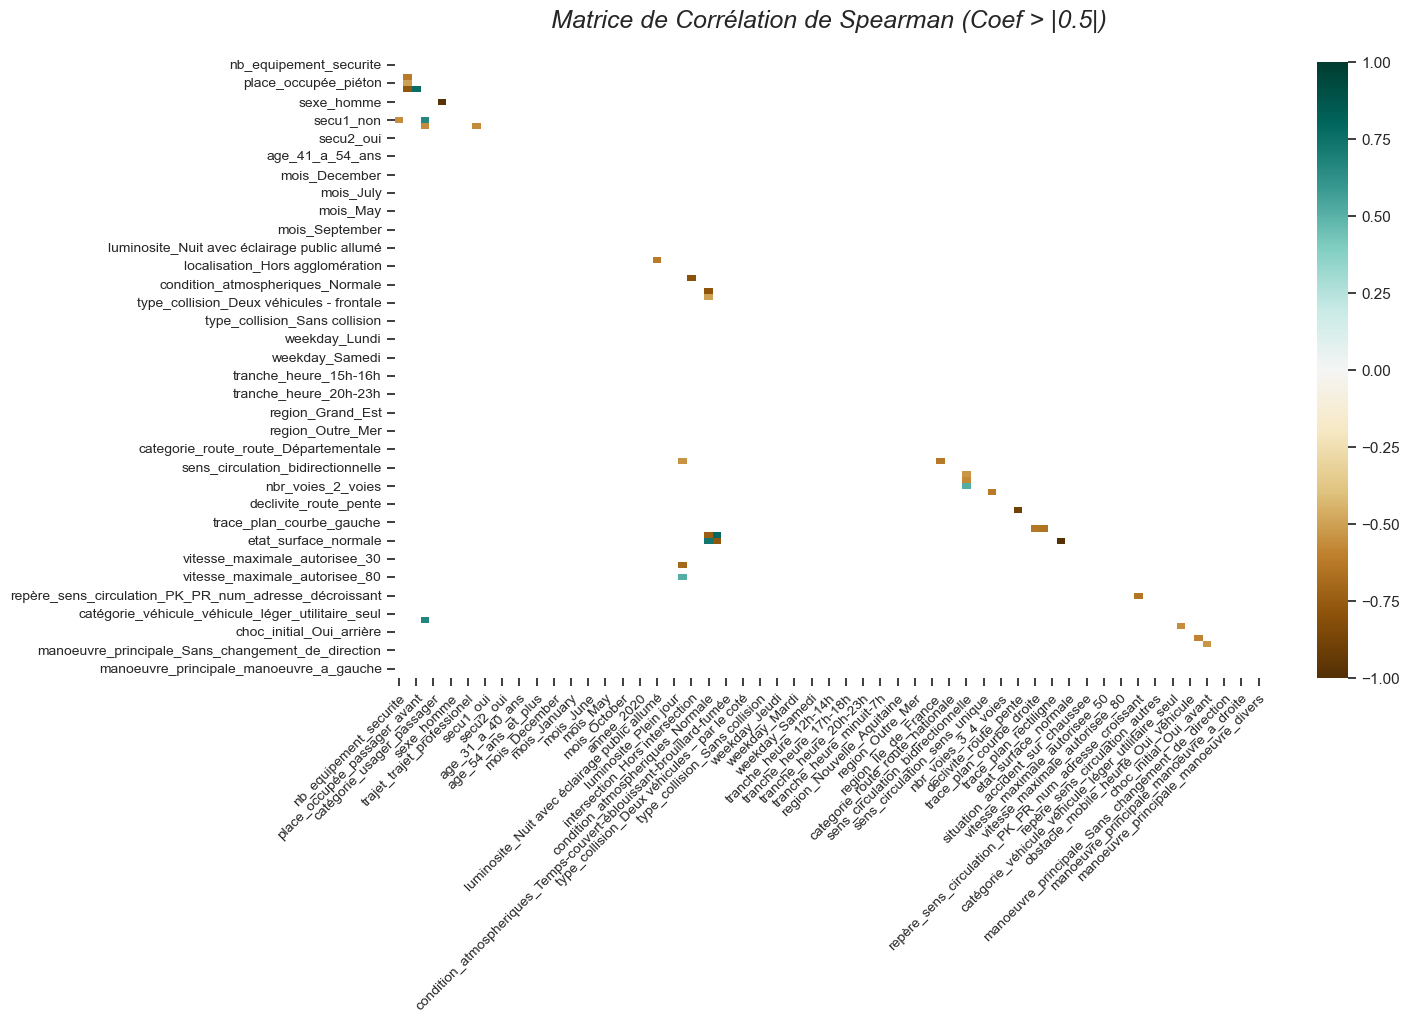

In [55]:
sns.set(style="ticks")

corr_df = data.corr(method='spearman')
filteredDf = corr_df[((corr_df >= .5) | (corr_df <= -.5)) & (corr_df !=1.000)]

# Heatmap de la matrice de corrélation

mask = np.zeros_like(filteredDf)
mask[np.triu_indices_from(mask, 1)] = True

ax = sns.heatmap(filteredDf, mask = mask, vmin=-1, vmax=1, center=0,
                 cmap="BrBG", annot=False, annot_kws={"size": 10})

ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize=10,
                   rotation=45, ha='right', rotation_mode='anchor')

ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize=10,
                   horizontalalignment='right')

plt.title("Matrice de Corrélation de Spearman (Coef > |0.5|)\n",
          loc="center", fontsize=18, fontstyle='italic')
plt.show()

Graphiquement, on constate qu'il y a des variables corrélées entre elles (positivement en vert foncé et négativement en marron foncé).
Vérifions-le satistiquement.

Nous allons effectuer des **tests de corrélation** dont l'intérêt est d’apporter plus de pertinence et fiabilité à la lecture des coefficients de corrélation.
On pose les hypothèses de départ :

>H0 : Variables indépendantes si p-value > 5% <br>
>H1 : Variables non indépendantes si p-value < 5% : On peut en conclure que le coefficient de corrélation est différent de zéro et qu’une relation monotone existe entre les 2 variables. L'une des variables n'apportent donc pas plus d'informations que l'autre ; une des variables sera supprimée.

On effectue un test de corrélation sur chaque variable 2 à 2 en isolant uniquement la p-value.

In [56]:
test_corr = np.empty((len(data.columns), len(data.columns),))
test_corr[:] = np.nan

for i in range(0, len(data.columns)):
    for j in range(0, len(data.columns)):
        test_corr[i, j] = stats.spearmanr(data.iloc[:, i], data.iloc[:, j])[1]

df_pvalue = pd.DataFrame(test_corr, columns=data.columns, index=data.columns)
#df_pvalue

In [57]:
df_pvalue.shape

(101, 101)

In [58]:
df_pvalue.head()

,nb_equipement_securite,place_occupée_conducteur,place_occupée_passager_avant,place_occupée_piéton,catégorie_usager_passager,sexe_femme,sexe_homme,trajet_trajet_personnel,trajet_trajet_professionel,secu1_non,...,obstacle_mobile_heurté_Oui_piéton,obstacle_mobile_heurté_Oui_véhicule,choc_initial_Oui_arrière,choc_initial_Oui_avant,choc_initial_Oui_côté_tonneaux,manoeuvre_principale_Sans_changement_de_direction,manoeuvre_principale_autre_inconnu,manoeuvre_principale_manoeuvre_a_droite,manoeuvre_principale_manoeuvre_a_gauche,manoeuvre_principale_manoeuvre_divers
nb_equipement_securite,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.29062,0.00103,0.00000
place_occupée_conducteur,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.05604,0.00000,0.67587
place_occupée_passager_avant,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.17216,0.49667,0.00000,0.00000
place_occupée_piéton,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00015,0.00000,0.00000
catégorie_usager_passager,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.01047,0.68084,0.00000,0.00000


In [59]:
pd.reset_option("display.max_colwidth")

# Transformation de la matrice carrée en DF long (empilé)
df_pvalue = df_pvalue.rename_axis('variable_1').reset_index()

df_pvalue_long = df_pvalue.melt(id_vars = 'variable_1',
                                var_name = 'variable_2',
                                value_name='p_value')

In [60]:
df_pvalue_long.head()

,variable_1,variable_2,p_value
0,nb_equipement_securite,nb_equipement_securite,0.00000
1,place_occupée_conducteur,nb_equipement_securite,0.00000
2,place_occupée_passager_avant,nb_equipement_securite,0.00000
3,place_occupée_piéton,nb_equipement_securite,0.00000
4,catégorie_usager_passager,nb_equipement_securite,0.00000


In [61]:
# Remove comparisons of the same feature
sorted_pvalue_features = df_pvalue_long[
            (df_pvalue_long.variable_1 != df_pvalue_long.variable_2)]

# Remove duplicates
sorted_pvalue_features = sorted_pvalue_features.iloc[:-2:2]

In [62]:
print(sorted_pvalue_features.shape)
sorted_pvalue_features.head()

(5049, 3)


,variable_1,variable_2,p_value
1,place_occupée_conducteur,nb_equipement_securite,0.00000
3,place_occupée_piéton,nb_equipement_securite,0.00000
5,sexe_femme,nb_equipement_securite,0.00000
7,trajet_trajet_personnel,nb_equipement_securite,0.00000
9,secu1_non,nb_equipement_securite,0.00000


 Quelles sont les variables dont le coefficient de corrélation est statistiquement différent de zéro ? 
 En d'autres termes, quelles variables ne sont pas indépendantes (existence d'une relation monotone les 2 variables), c'est-à-dire avec p < 0.05 ?

In [63]:
non_independantes_variables = sorted_pvalue_features[sorted_pvalue_features.p_value < 0.05].sort_values(by=['variable_1', 'variable_2', 'p_value', ])
print(f"Nombre de pairs de variables non indépendantes : {non_independantes_variables.shape[0]}")

Nombre de pairs de variables non indépendantes : 4207


In [64]:
independantes_variables = sorted_pvalue_features[sorted_pvalue_features.p_value > 0.05].sort_values(by=['variable_1', 'variable_2', 'p_value', ])
print(f"Nombre de pairs de variables indépendantes : {independantes_variables.shape[0]}")

Nombre de pairs de variables indépendantes : 842


Après avoir supprimer les p_value des variables avec elles-mêmes et les pairs identiques, il avons 4207 pairs de variables non indépendantes et 842 pairs de variables indépendantes ! 
On ne peut donc pas utiliser cette méthode pour sélectionner les variables pertinentes pour la réalisation de nos objectifs.

La classe DropCorrelatedFeatures de Feature-engine sélectionne les caractéristiques hautement corrélées, et supprime la première caractéristique qui est corrélée avec quoi que ce soit d'autre sans aucune autre considération.

La SmartCorrelationSelection permet de sélectionner une caractéristique de chaque groupe corrélé en fonction des performances du modèle, du nombre de valeurs manquantes, de la cardinalité ou de la variance.

In [65]:
from feature_engine.selection import DropCorrelatedFeatures, SmartCorrelatedSelection

selec = DropCorrelatedFeatures(threshold=0.8,
                               method='spearman',
                               missing_values='ignore'
                               )


# find correlated features

selec.fit(data)

DropCorrelatedFeatures(method='spearman')

In [66]:
# chaque ensemble contient un groupe de caractéristiques corrélées

selec.correlated_feature_sets_

[{'sexe_femme', 'sexe_homme'},
 {'intersection_Hors intersection',
  'intersection_Intersection_2_a_4_branches'},
 {'declivite_route_pente', 'declivite_route_plat'},
 {'etat_surface_mouillee_souillee_glissante', 'etat_surface_normale'}]

Nous pouvons donc maintenant sélectionner la caractéristique avec la variance la plus élevée de chaque groupe.

In [67]:
# correlation selector

sel = SmartCorrelatedSelection(
    variables=None,
    method="pearson",
    threshold=0.8,
    missing_values="raise",
    selection_method="variance",
    estimator=None,
    scoring="roc_auc",
    cv=3,
)

sel.fit(data, y)

SmartCorrelatedSelection(missing_values='raise', selection_method='variance')

In [68]:
# let's examine the variance of the features from the first group of
# correlated ones
group = sel.correlated_feature_sets_[0]

data[group].std()

sexe_femme   0.46373
sexe_homme   0.46697
dtype: float64

In [69]:
# let's examine the variance of the features from the second group of
# correlated ones

group = sel.correlated_feature_sets_[1]

data[group].std()

intersection_Hors intersection             0.47973
intersection_Intersection_2_a_4_branches   0.44150
dtype: float64

In [70]:
# let's examine the variance of the features from the third group of
# correlated ones

group = sel.correlated_feature_sets_[2]

data[group].std()


declivite_route_pente   0.36396
declivite_route_plat    0.39216
dtype: float64

In [71]:
# pour le 4ième groupe

group = sel.correlated_feature_sets_[3]

data[group].std()

etat_surface_normale                       0.39913
etat_surface_mouillee_souillee_glissante   0.39551
dtype: float64

In [72]:
sel.features_to_drop_

['sexe_femme',
 'intersection_Intersection_2_a_4_branches',
 'declivite_route_pente',
 'etat_surface_mouillee_souillee_glissante']

In [73]:
# drop correlated features

data = sel.transform(data)

data.shape

(363336, 97)

**Limites des méthodes de filtrage :**

Les méthodes de filtrage sélectionnent les fonctionnalités indépendamment de tout classificateur spécifique. Par conséquent, *l'un des inconvénients des méthodes de filtrage est qu'elles tendent à ignorer les effets des sous-ensembles de fonctionnalités sur les performances de l'algorithme de prédiction.*

De plus, les méthodes de filtrage évaluent souvent les variables individuellement et sont donc également inconscientes du fait que certaines variables peuvent ne pas être prédictives prises isolément mais qu’elles le soient lorsqu'elles sont combinées avec d'autres variables

# Les méthodes Embedded

Les méthodes Embedded **intègrent la sélection de fonctionnalités à la construction de l'algorithme d'apprentissage automatique.**

Les méthodes intégrées effectuent la sélection des fonctionnalités lors de l'apprentissage du classifieur ou des régresseurs. Ces méthodes sont donc embarquées dans l'algorithme.

Les méthodes embarquées ont les avantages à la fois des Méthodes Wrapper (que nous n'utiliserons pas ici car elles demandent beaucoup de temps et de ressources) et Filter. Elles incluent l'interaction des caractéristiques avec le modèle de classifieur ou le régresseur modèle tout comme les méthodes wrapper, et comme les méthodes de filtrage, elles sont beaucoup moins gourmandes en calcul. De plus, les méthodes embarquées sont capables de détecter l'interaction entre les variables car elles évaluent l'ensemble des données en même temps et trouvent le sous-ensemble de fonctionnalités qui convient à l'algorithme en cours de formation.

**Cela signifie que les méthodes intégrées sont généralement la méthode de choix au moment de la sélection des fonctionnalités.**

Les méthodes embarquées font partie de la formation de l'algorithme d'apprentissage automatique. Ainsi, les étapes typiques impliquent la formation d'un algorithme d'apprentissage automatique en utilisant toutes les fonctionnalités, puis en dérivant l'importance de ces caractéristiques selon l'algorithme utilisé, et enfin en supprimant les fonctionnalités non importantes en suivant certains critères qui dépendront de l'algorithme lui-même.

Un exemple de méthodes embarquées est la régularisation LASSO (pour la régression). Et dans une certaine mesure, nous pourrions également utiliser les coefficients de régression des modèles linéaires pour évaluer l'importance des différentes caractéristiques de l'ensemble de données et décider lesquelles conserver et lesquelles exclure.

**Les arbres et les forêts aléatoires sont également très utiles pour sélectionner des fonctionnalités.** 

En résumé, les méthodes embarquées donnent une meilleure précision prédictive que les méthodes de filtrage car elles sont rapides et moins coûteuses en calcul que les méthodes wrapper. Elles ont également tendance à trouver un très bon sous-ensemble de fonctionnalités pour l'algorithme donné. En revanche, nous devons garder à l'esprit les caractéristiques des différents algorithmes pour comprendre l'importance dérivée de ce que nous pouvons faire avec eux.

Le processus d'ingénierie des caractéristiques consiste à sélectionner les caractéristiques minimales requises pour produire un modèle valide, car plus un modèle contient de caractéristiques, plus il est complexe (et plus les données sont rares), donc plus le modèle est sensible aux erreurs dues à la variance. Une approche courante pour éliminer les caractéristiques consiste à décrire leur importance relative pour un modèle, puis à éliminer les caractéristiques faibles ou les combinaisons de caractéristiques et à réévaluer pour voir si le modèle se comporte mieux lors de la validation croisée.

De nombreuses formes de modèles décrivent l'impact sous-jacent des caractéristiques les unes par rapport aux autres. Dans scikit-learn, les modèles d'arbre de décision et les ensembles d'arbres tels que Random Forest, Gradient Boosting et Ada Boost fournissent un feature_importances_attribut lorsqu'ils sont ajustés. Le visualiseur Yellowbrick FeatureImportances utilise cet attribut pour classer et tracer les importances relatives.

In [74]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, y, stratify=y, test_size=0.3, random_state=101)

X_train.shape, X_test.shape

((254335, 97), (109001, 97))

## Feature Importances with RandomForestClassifier

Les forêts aléatoires sont l'un des algorithmes d'apprentissage automatique les plus populaires. Son succès est dû au fait qu'il offre de bonnes performances prédictives, un faible surajustement et une interprétabilité facile. 

Cette interprétabilité est donnée par le fait qu'il est simple de déduire l'importance de chaque variable sur la décision de l'arbre. En d'autres termes, il est facile de calculer dans quelle mesure chaque variable contribue à la décision.

Les forêts aléatoires se composent généralement de 4 à 12 cents arbres de décision, chacun d'eux étant construit sur une extraction aléatoire des observations de l'ensemble de données et une extraction aléatoire des caractéristiques. Tous les arbres ne voient pas toutes les caractéristiques ou toutes les observations, ce qui garantit que les arbres sont décorrélés et donc moins sujets au sur-ajustement. Chaque arbre est également une séquence de questions oui-non basées sur une seule ou une combinaison de fonctionnalités. À chaque nœud (c'est-à-dire à chaque question), les trois divisent l'ensemble de données en 2 compartiments, chacun d'eux hébergeant des observations plus similaires entre elles et différentes de celles de l'autre compartiment. Par conséquent, l'importance de chaque fonctionnalité est dérivée de la "pureté" de chacun des compartiments.

Pour la classification, la mesure de l'impureté est soit Gini, soit l'entropie. Pour la régression, la mesure de l'impureté est la variance. Lors de la formation d'un arbre, il est possible de calculer de combien chaque caractéristique diminue l'impureté. Plus une caractéristique diminue l'impureté, plus la caractéristique est importante. Dans les forêts aléatoires, la diminution des impuretés provoquée par chaque caractéristique est moyennée sur les arbres pour déterminer l'importance finale de la variable.

En général, les fonctionnalités sélectionnées au sommet des arbres sont plus importantes que les fonctionnalités sélectionnées aux nœuds d'extrémité des arbres, car généralement les divisions supérieures conduisent à des gains d'informations plus importants.

**Remarque :**
Les forêts aléatoires et les arbres de décision en général privilégient les entités à cardinalité élevée Les caractéristiques corrélées se verront attribuer une importance égale ou similaire, mais une importance globale réduite par rapport au même arbre construit sans contreparties corrélées

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [76]:
sel_ = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=101))

sel_.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(random_state=101))

In [77]:
# Quel est le seuil de sélection

sel_.threshold_

0.010309278350515464

In [78]:
selected_feat = data.columns[(sel_.get_support())]

len(selected_feat)

40

In [79]:
print(list(selected_feat))

['nb_equipement_securite', 'place_occupée_conducteur', 'place_occupée_piéton', 'sexe_homme', 'trajet_trajet_personnel', 'trajet_trajet_professionel', 'secu2_non', 'secu2_oui', 'age_22_a_30_ans', 'age_31_a_40_ans', 'age_41_a_54_ans', 'age_54_ans_et_plus', 'annee_2020', 'annee_2021', 'luminosite_Plein jour', 'localisation_Hors agglomération', 'intersection_Hors intersection', 'type_collision_Deux véhicules – par le coté', 'weekday_Jeudi', 'weekday_Lundi', 'weekday_Mardi', 'weekday_Mercredi', 'weekday_Samedi', 'weekday_Vendredi', 'tranche_heure_12h-14h', 'tranche_heure_17h-18h', 'region_Île_de_France', 'categorie_route_route_Départementale', 'nbr_voies_2_voies', 'declivite_route_plat', 'infrastructure_Oui', 'situation_accident_sur_chaussee', 'repère_sens_circulation_PK_PR_num_adresse_croissant', 'repère_sens_circulation_PK_PR_num_adresse_décroissant', 'catégorie_véhicule_bicyclette_EDP', 'catégorie_véhicule_véhicule_léger_utilitaire_seul', 'obstacle_mobile_heurté_Oui_piéton', 'obstacle_mo

In [80]:
print('Total features: {}'.format((data.shape[1])))

print('Features sélectionnées : {}'.format(len(selected_feat)))

print(
    "Caractéristiques dont l'importance est supérieure à l'importance moyenne de toutes les caractéristiques: {}".format(
        np.sum(sel_.estimator_.feature_importances_ >
               sel_.estimator_.feature_importances_.mean())))

Total features: 97
Features sélectionnées : 40
Caractéristiques dont l'importance est supérieure à l'importance moyenne de toutes les caractéristiques: 40


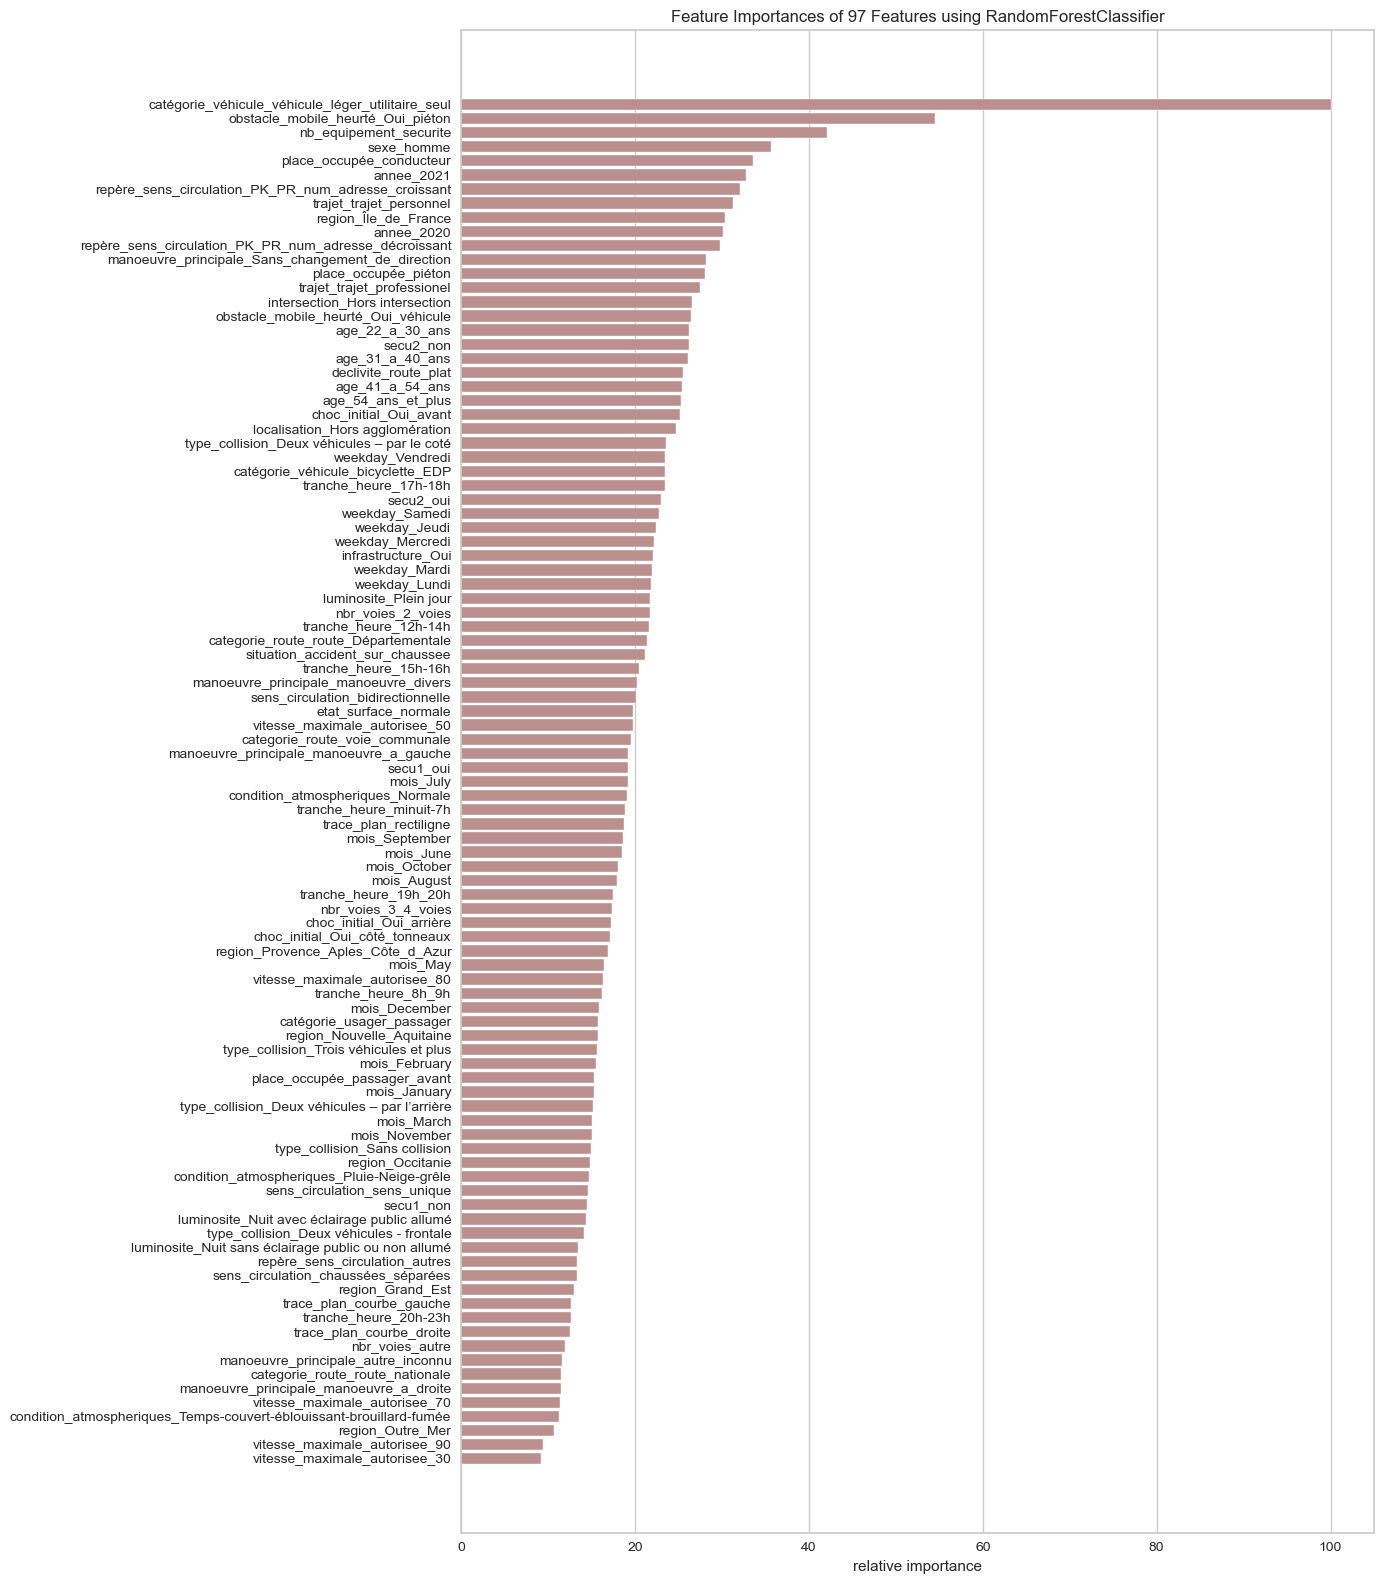

<AxesSubplot:title={'center':'Feature Importances of 97 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [81]:
# Avec le module yellowbrick

from yellowbrick.model_selection import FeatureImportances

rfc_model = RandomForestClassifier(n_estimators=100, random_state=101)

fig, ax = plt.subplots(figsize=(14, 16))

fi_viz = FeatureImportances(rfc_model, labels=data.columns, colors=["rosybrown"])

fi_viz.fit(X_train, y_train)

fi_viz.show()

## Recursive Feature Selection using Random Forests importance

Les forêts aléatoires attribuent une importance égale ou similaire aux caractéristiques hautement corrélées. De plus, lorsque les caractéristiques sont corrélées, l'importance attribuée est inférieure à l'importance attribuée à la caractéristique elle-même, si l'arbre est construit sans les contreparties corrélées.

Par conséquent, au lieu d'éliminer les fonctionnalités basées sur l'importance par la force brute comme nous l'avons fait dans la section précédente, nous pourrions obtenir une meilleure sélection en supprimant une fonctionnalité à la fois et en recalculant l'importance à chaque tour. Cette procédure est appelée **élimination récursive des fonctionnalités (RFE).**

RFE est un hybride entre les méthodes embarquées et wrapper : il est basé sur le calcul dérivé lors de l'ajustement du modèle, mais il nécessite également l'ajustement de plusieurs modèles.

Le cycle est le suivant :

- Construire des forêts aléatoires en utilisant toutes les fonctionnalités
- Supprimer la fonctionnalité la moins importante
- Construire des forêts aléatoires et recalculer l'importance
- Répéter jusqu'à ce qu'un critère soit rempli

Dans cette situation, lorsqu'une caractéristique fortement corrélée à une autre est supprimée, l'importance de la caractéristique restante augmente. Cela peut conduire à une meilleure sélection de l'espace des caractéristiques. En revanche, la construction de plusieurs forêts aléatoires prend beaucoup de temps et de ressources de calcul, en particulier si le jeu de données contient un grand nombre d'entités.

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_auc_score

In [83]:
sel_ = RFE(RandomForestClassifier(n_estimators=50, random_state=101))
sel_.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(n_estimators=50, random_state=101))

In [84]:
selected_feat_rfe = data.columns[(sel_.get_support())]

len(selected_feat_rfe)

48

In [85]:
print(list(selected_feat_rfe))

['nb_equipement_securite', 'place_occupée_conducteur', 'place_occupée_piéton', 'sexe_homme', 'trajet_trajet_personnel', 'trajet_trajet_professionel', 'secu2_non', 'age_22_a_30_ans', 'age_31_a_40_ans', 'age_41_a_54_ans', 'age_54_ans_et_plus', 'mois_July', 'mois_June', 'mois_October', 'mois_September', 'annee_2020', 'annee_2021', 'luminosite_Plein jour', 'localisation_Hors agglomération', 'intersection_Hors intersection', 'condition_atmospheriques_Normale', 'type_collision_Deux véhicules – par le coté', 'weekday_Jeudi', 'weekday_Lundi', 'weekday_Mardi', 'weekday_Mercredi', 'weekday_Samedi', 'weekday_Vendredi', 'tranche_heure_12h-14h', 'tranche_heure_15h-16h', 'tranche_heure_17h-18h', 'region_Île_de_France', 'categorie_route_route_Départementale', 'sens_circulation_bidirectionnelle', 'nbr_voies_2_voies', 'declivite_route_plat', 'trace_plan_rectiligne', 'etat_surface_normale', 'infrastructure_Oui', 'vitesse_maximale_autorisee_50', 'repère_sens_circulation_PK_PR_num_adresse_croissant', 'rep

In [86]:
importance = pd.DataFrame(sel_.estimator_.feature_importances_, 
                          index=selected_feat_rfe,
                          columns=['Score RFE'])

pd.set_option('display.float_format', '{:,.6f}'.format)
importance = importance.sort_values(by='Score RFE', ascending=True)
importance

,Score RFE
mois_October,0.014926
mois_June,0.015365
mois_September,0.015410
age_54_ans_et_plus,0.015578
mois_July,0.015854
manoeuvre_principale_manoeuvre_divers,0.016486
vitesse_maximale_autorisee_50,0.016539
trajet_trajet_professionel,0.016582
trace_plan_rectiligne,0.016607
etat_surface_normale,0.016755


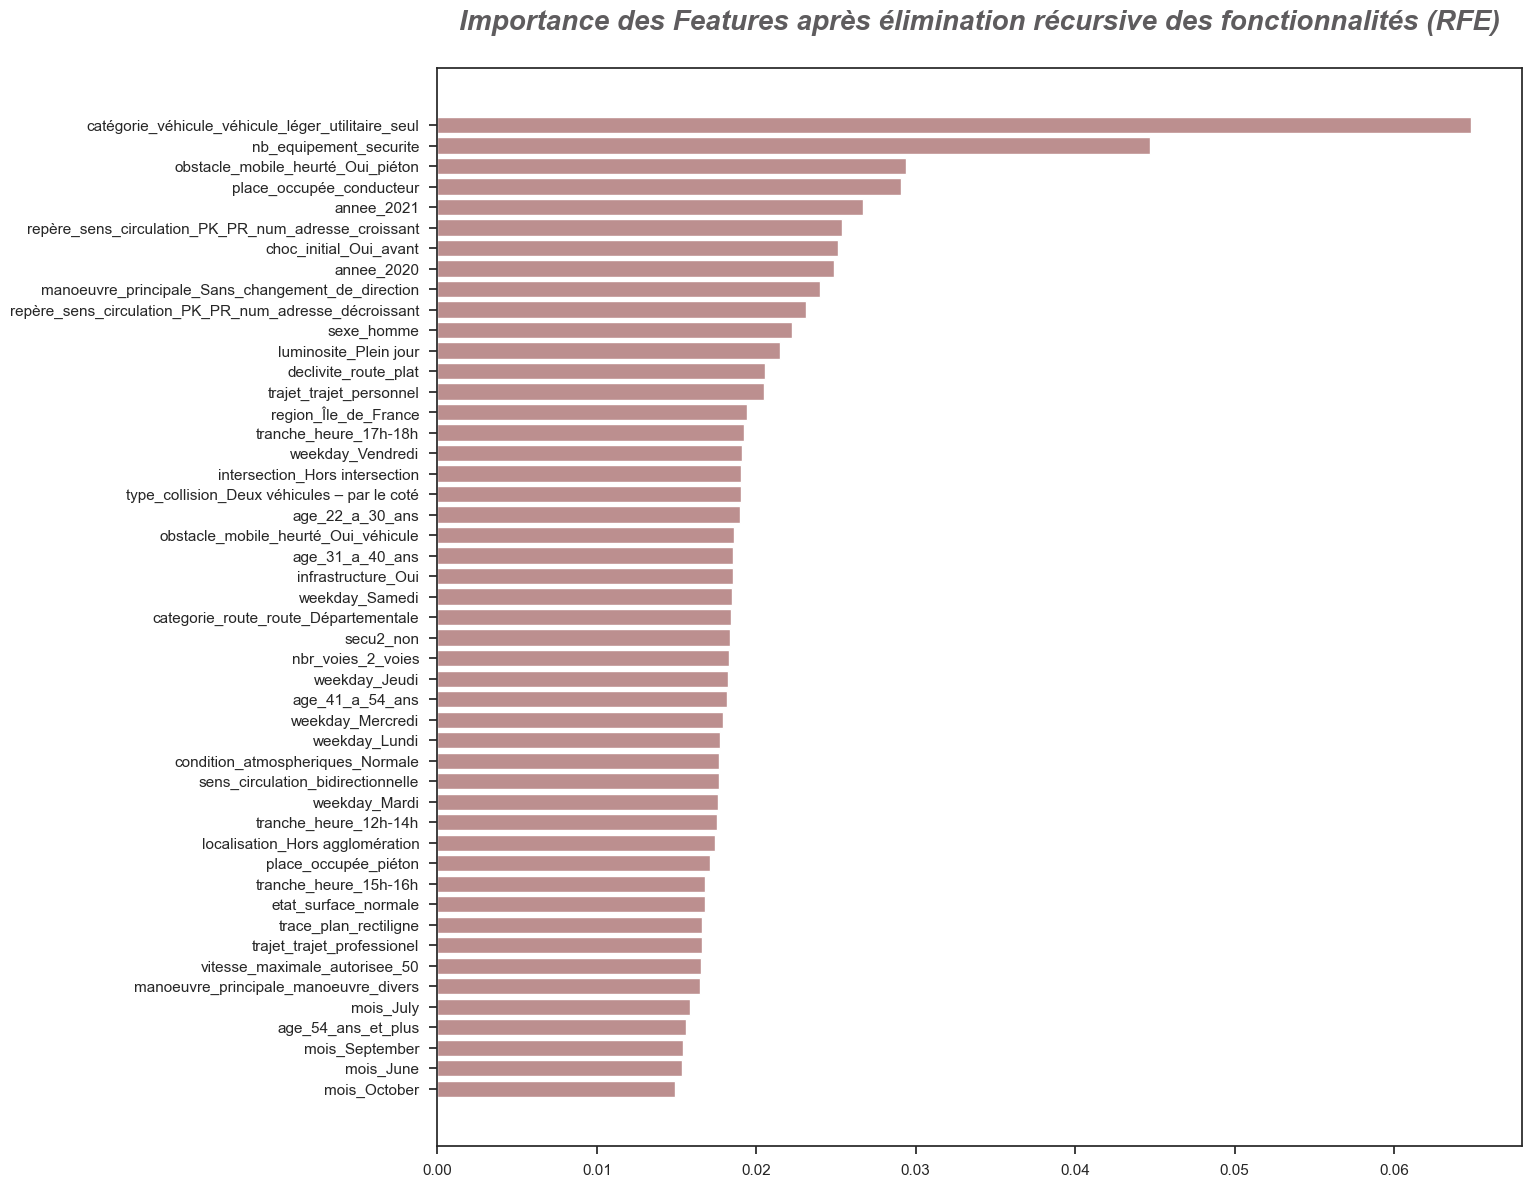

In [87]:
sns.set(style="ticks", rc={'figure.figsize': (14, 14)})

# plot feature importance
plt.barh(importance.index, 
         importance['Score RFE'],
         color = ["rosybrown"])

plt.title("Importance des Features après élimination récursive des fonctionnalités (RFE)\n",
          loc="center", fontsize=20,
          fontstyle='italic',
          fontweight='bold',
          color="#5e5c5e")

plt.show()

## Comparaison des performances des 2 sous-ensembles de fonctionnalités

In [88]:
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 25)

from sklearn.metrics import classification_report


In [89]:
def run_randomForests(X_train, X_test, y_train, y_test):
    
    rf = RandomForestClassifier(n_estimators=200, random_state=101)
    rf.fit(X_train, y_train)
    
    print('Train Set :')
    pred_train = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred_train, multi_class='ovr')))
    
    print('Test Set : ')
    pred_test = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred_test, multi_class='ovr')))
    print('')
    pred_test2 = rf.predict(X_test)
    print(classification_report(y_test, pred_test2))

In [90]:
# Random Forest Avec les variables sélectionnées une par une

print("Random Forest Avec les variables sélectionnées une par une :\n")
run_randomForests(X_train[selected_feat_rfe],
                  X_test[selected_feat_rfe],
                  y_train, y_test)

Random Forest Avec les variables sélectionnées une par une :

Train Set :
Random Forests roc-auc: 0.9999556848441093
Test Set : 
Random Forests roc-auc: 0.8199840754424376

                    precision    recall  f1-score   support

blessé_hospitalisé       0.49      0.35      0.41     16918
      blessé_léger       0.62      0.64      0.63     43737
           indemne       0.69      0.79      0.74     45511
               tué       0.30      0.04      0.07      2835

          accuracy                           0.64    109001
         macro avg       0.53      0.45      0.46    109001
      weighted avg       0.62      0.64      0.63    109001



In [91]:
# Random Forest Avec les variables sélectionnées toutes ensemble

print("Random Forest Avec les variables sélectionnées toutes ensemble :\n")
run_randomForests(X_train[selected_feat],
                  X_test[selected_feat],
                  y_train, y_test)

Random Forest Avec les variables sélectionnées toutes ensemble :

Train Set :
Random Forests roc-auc: 0.9997588210053946
Test Set : 
Random Forests roc-auc: 0.810734131208522

                    precision    recall  f1-score   support

blessé_hospitalisé       0.47      0.36      0.41     16918
      blessé_léger       0.61      0.63      0.62     43737
           indemne       0.69      0.78      0.73     45511
               tué       0.26      0.05      0.09      2835

          accuracy                           0.63    109001
         macro avg       0.51      0.45      0.46    109001
      weighted avg       0.61      0.63      0.62    109001



Nous pouvons constater que le modèle RFE a renvoyé un sous-ensemble de fonctionnalités légèrement meilleur que le Random Forest simple. 

Nous sélectionnons donc l'ensemble des variables issu de la méthode Recursive Feature Selection (RFE).

In [92]:
X_train = X_train[selected_feat_rfe]
X_test = X_test[selected_feat_rfe]

X_train.shape, X_test.shape

((254335, 48), (109001, 48))

In [93]:
# Sauvegarde des datasets
df_accidents.to_csv('df_accidents.csv', encoding='utf-8', index=None)
X_train.to_csv('X_train.csv', encoding='utf-8', index=None)
X_test.to_csv('X_test.csv', encoding='utf-8', index=None)
y_train.to_csv('y_train.csv', encoding='utf-8', index=None)
y_test.to_csv('y_test.csv', encoding='utf-8', index=None)